In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(25, 25)
data = pd.read_csv('income_evaluation.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2]:
from sklearn import preprocessing 
data = data.drop([' workclass', ' race', ' capital-loss', ' native-country'], axis='columns')

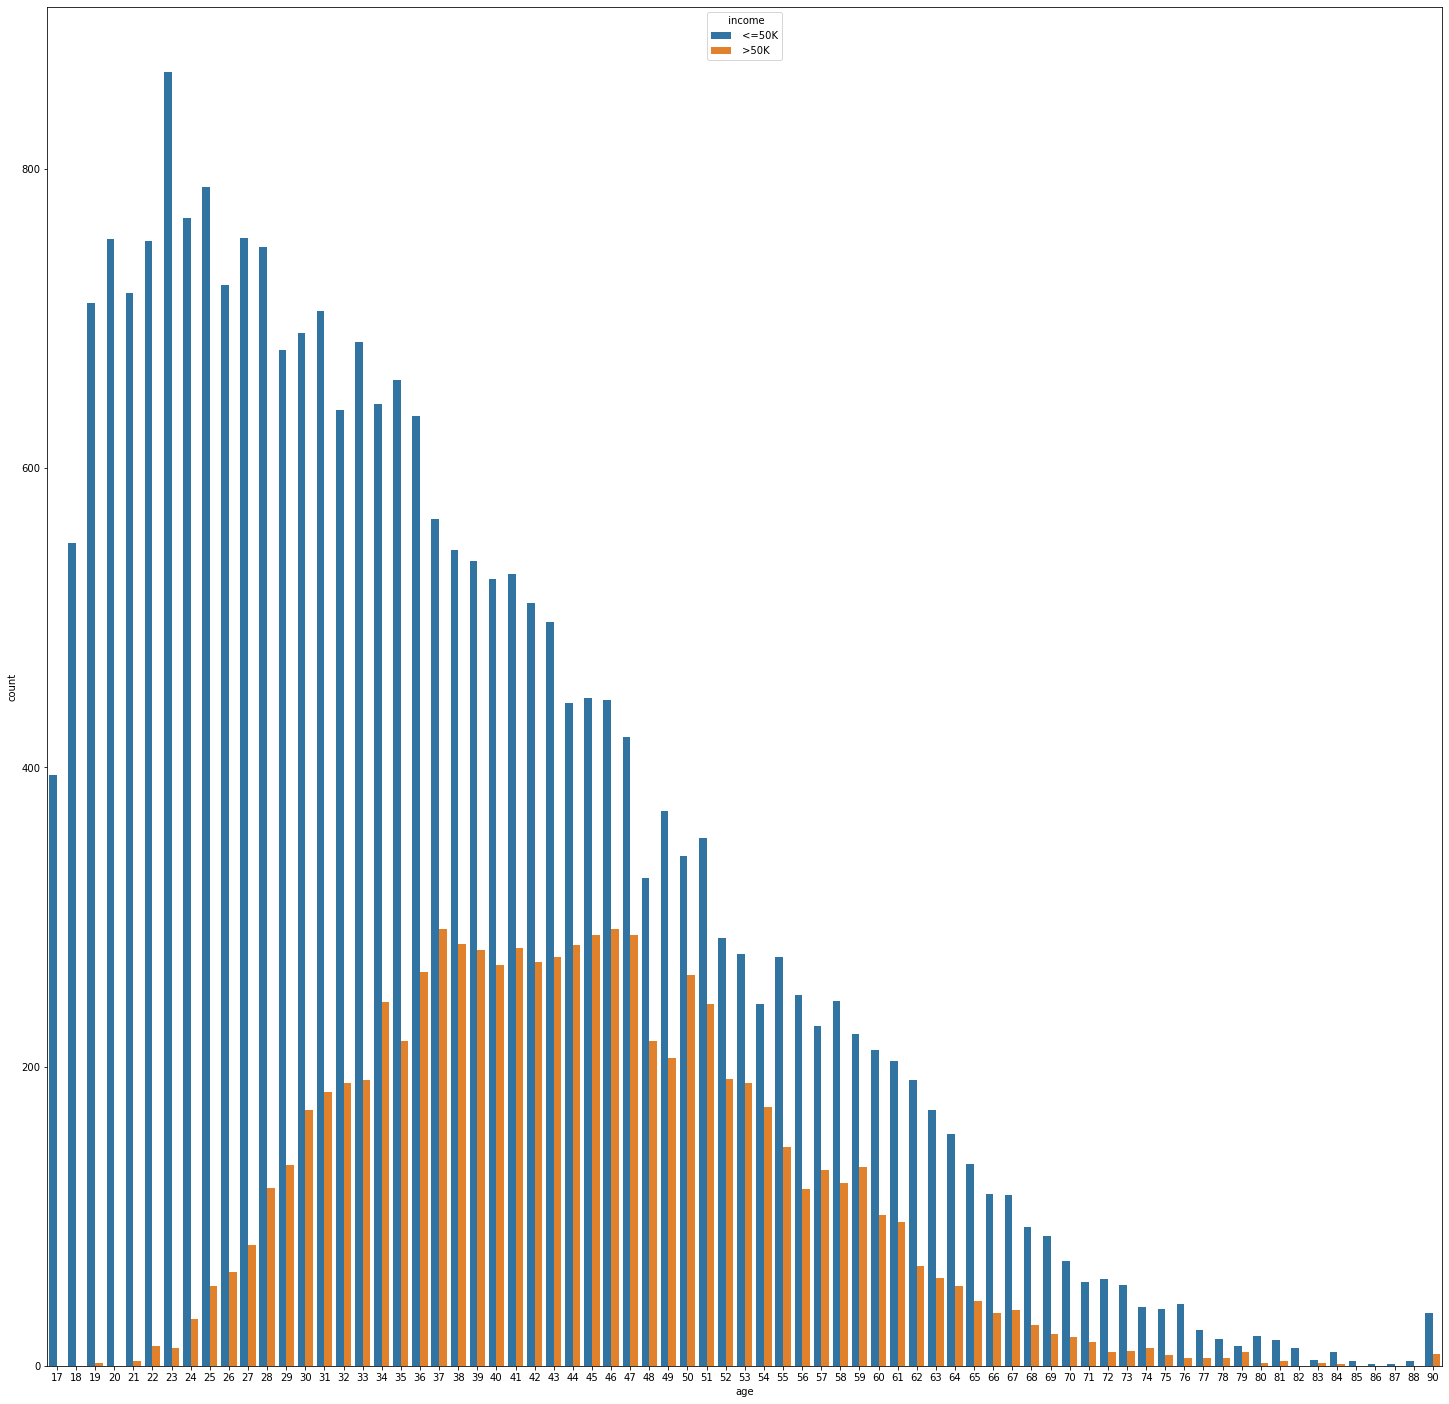

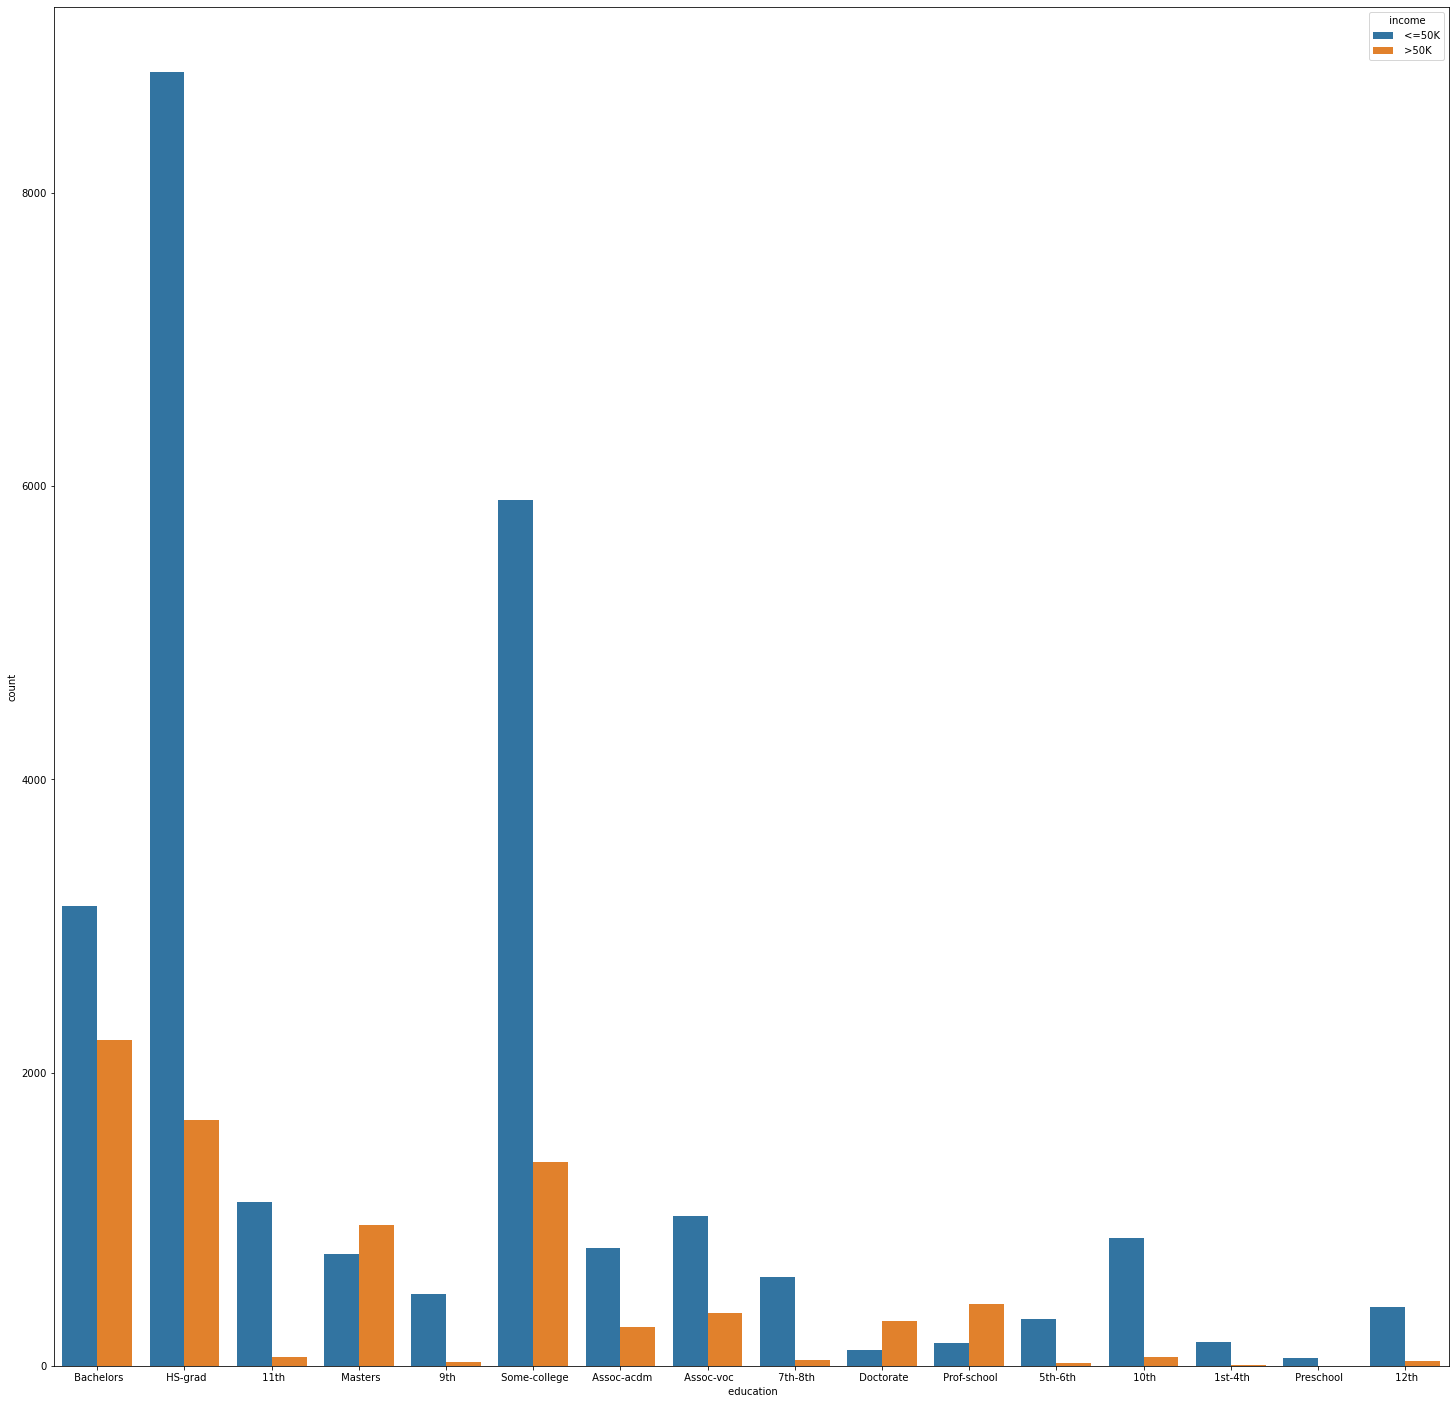

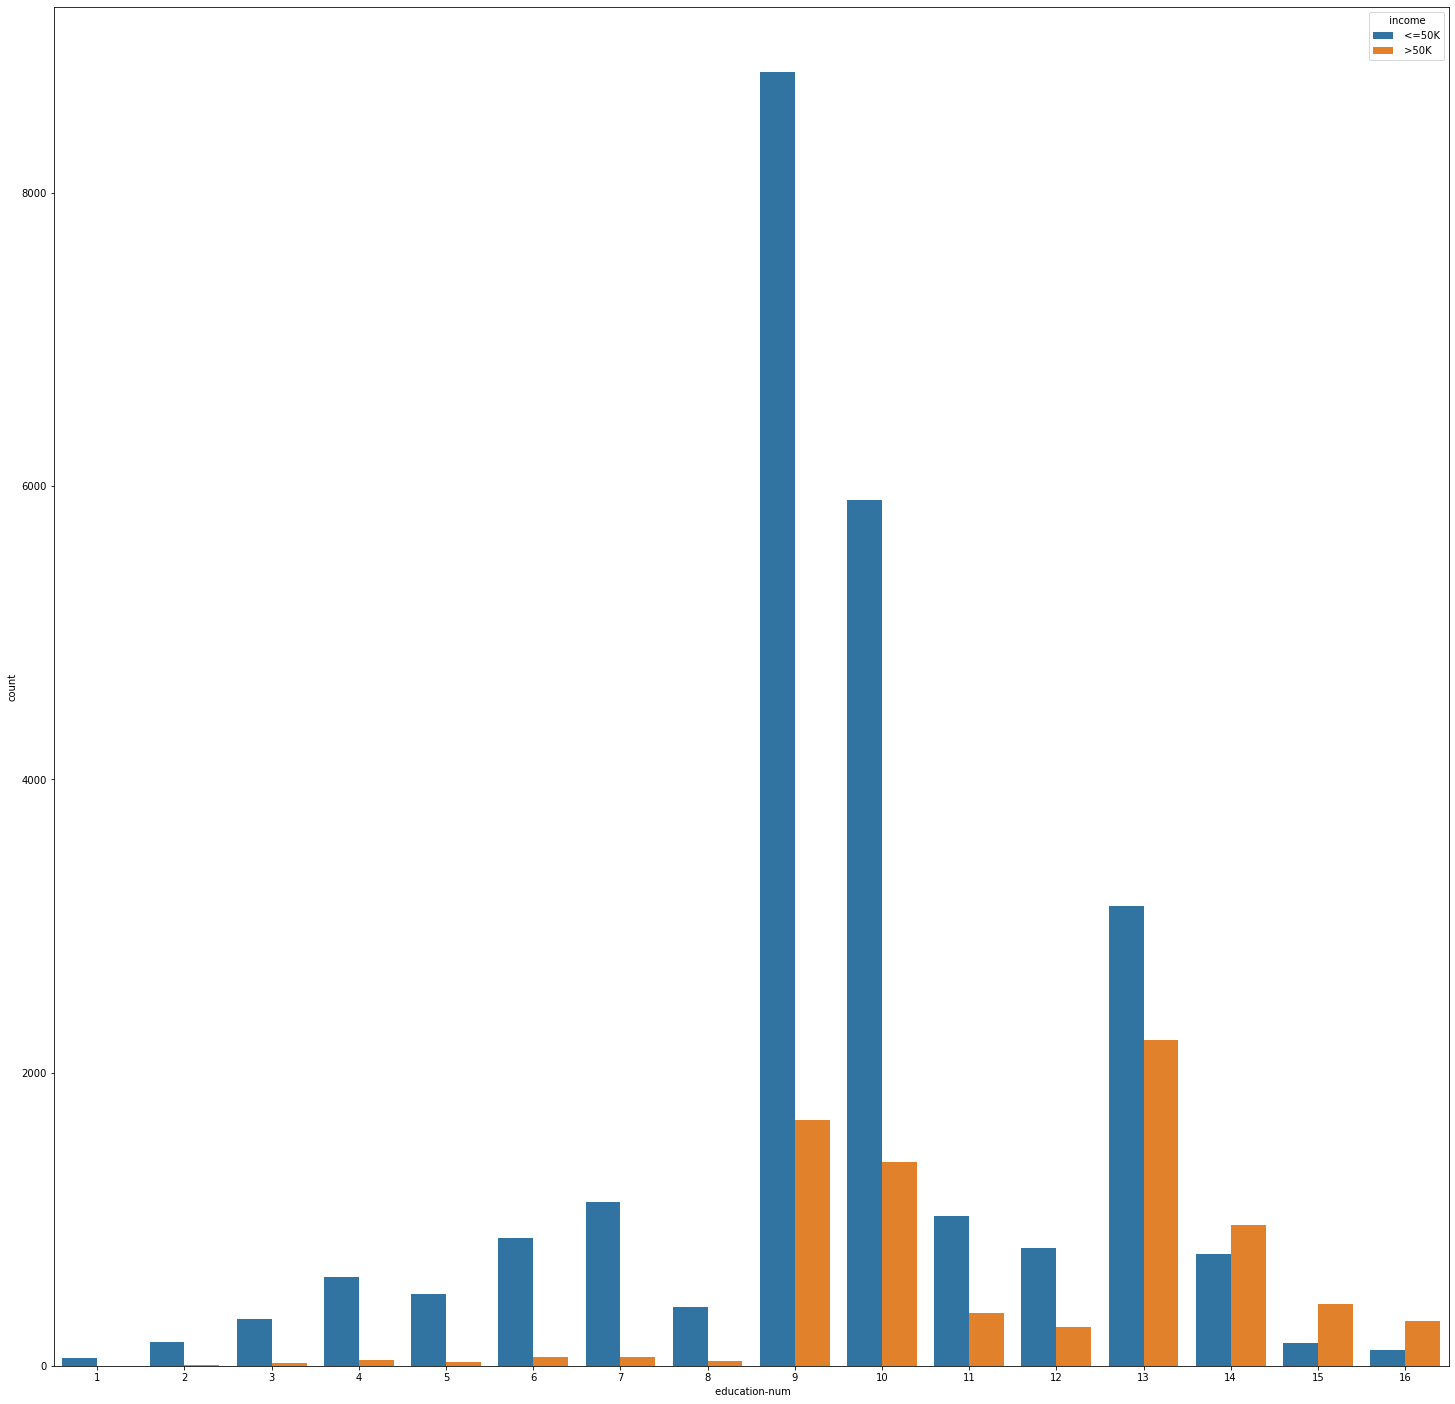

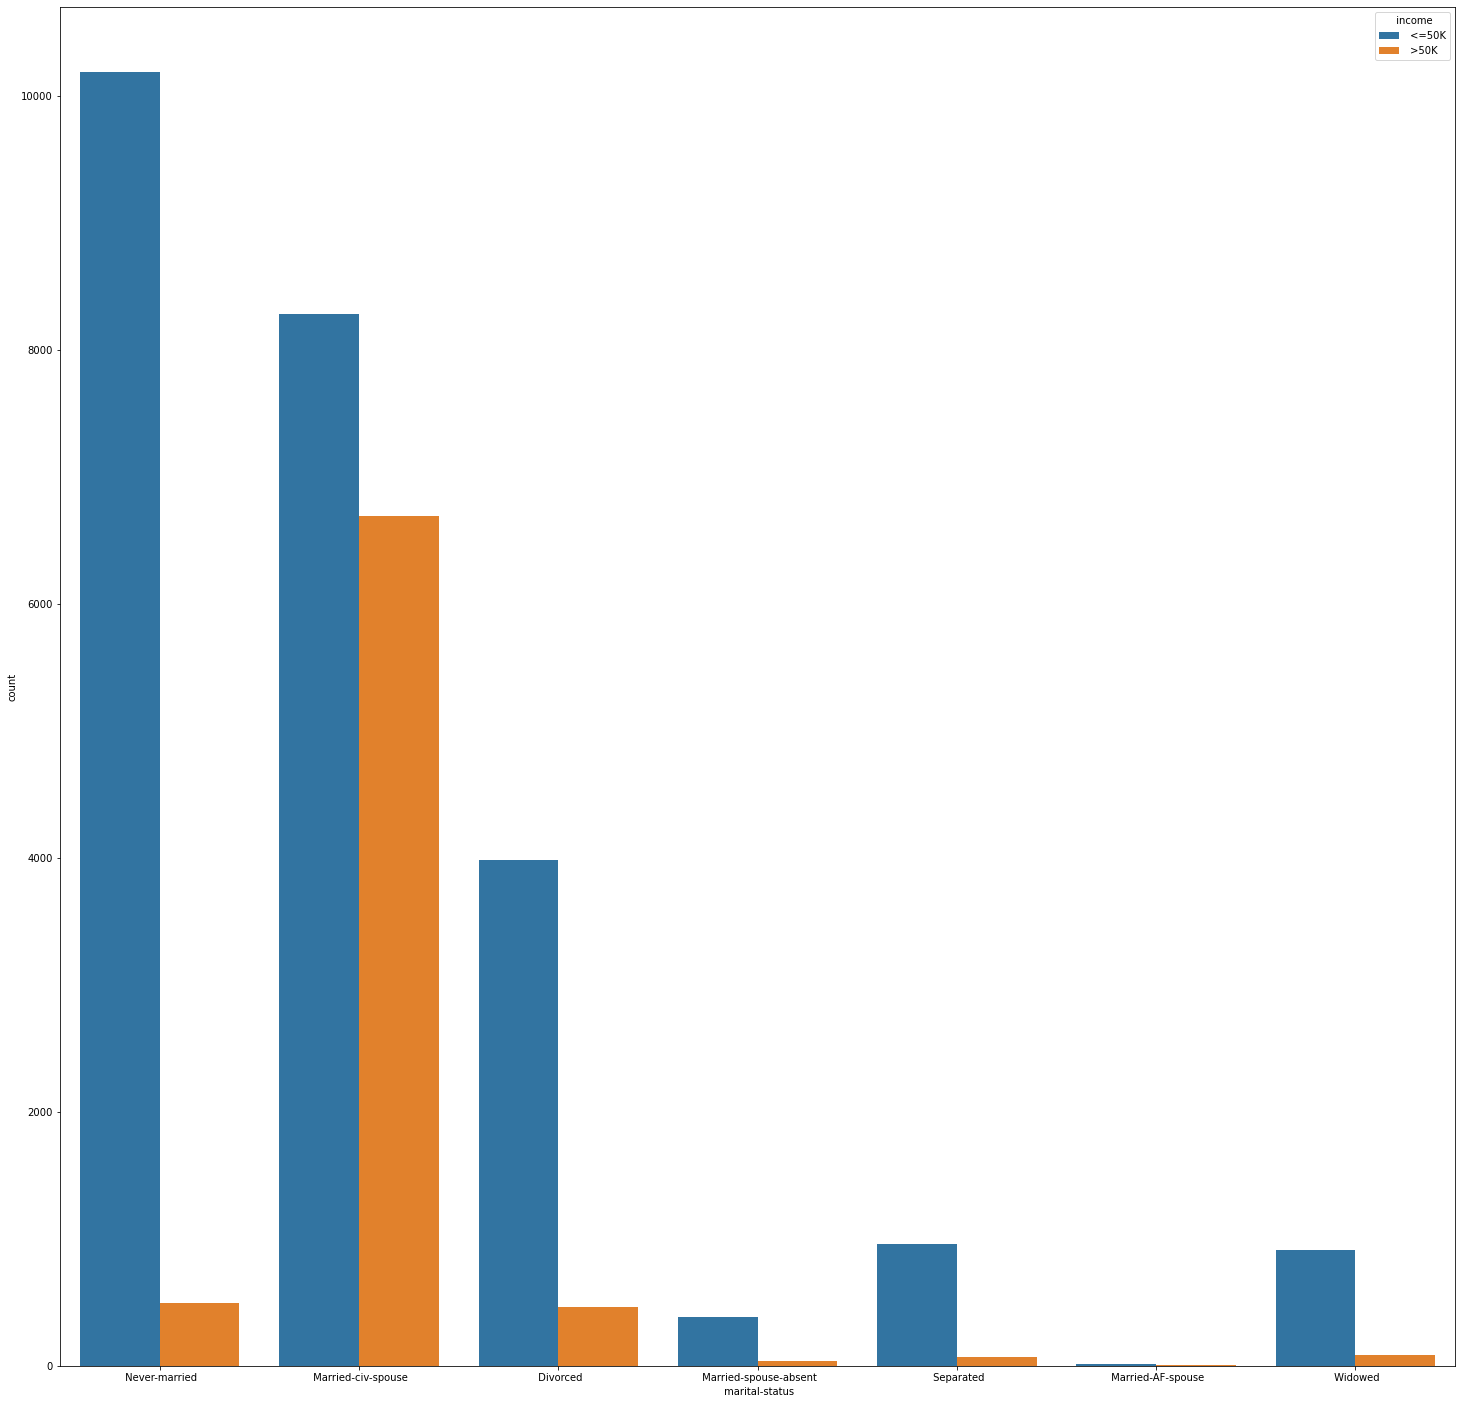

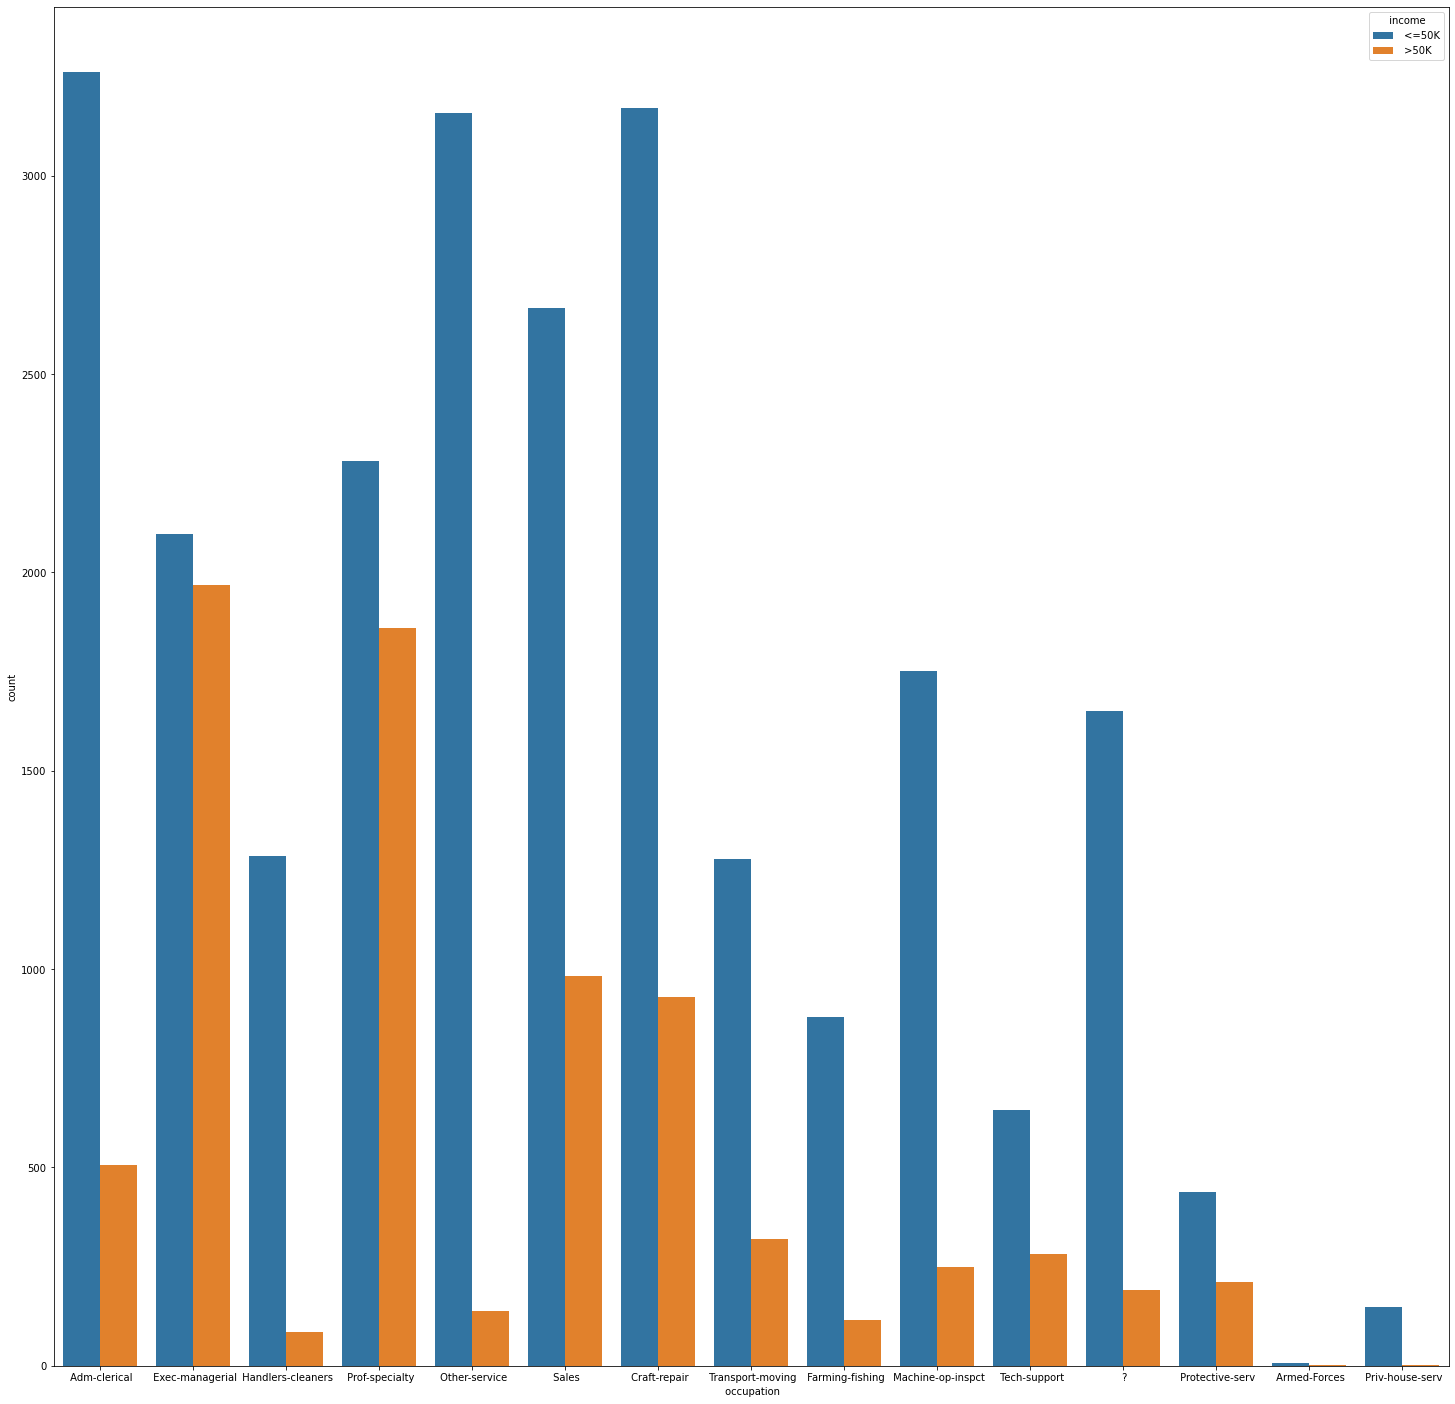

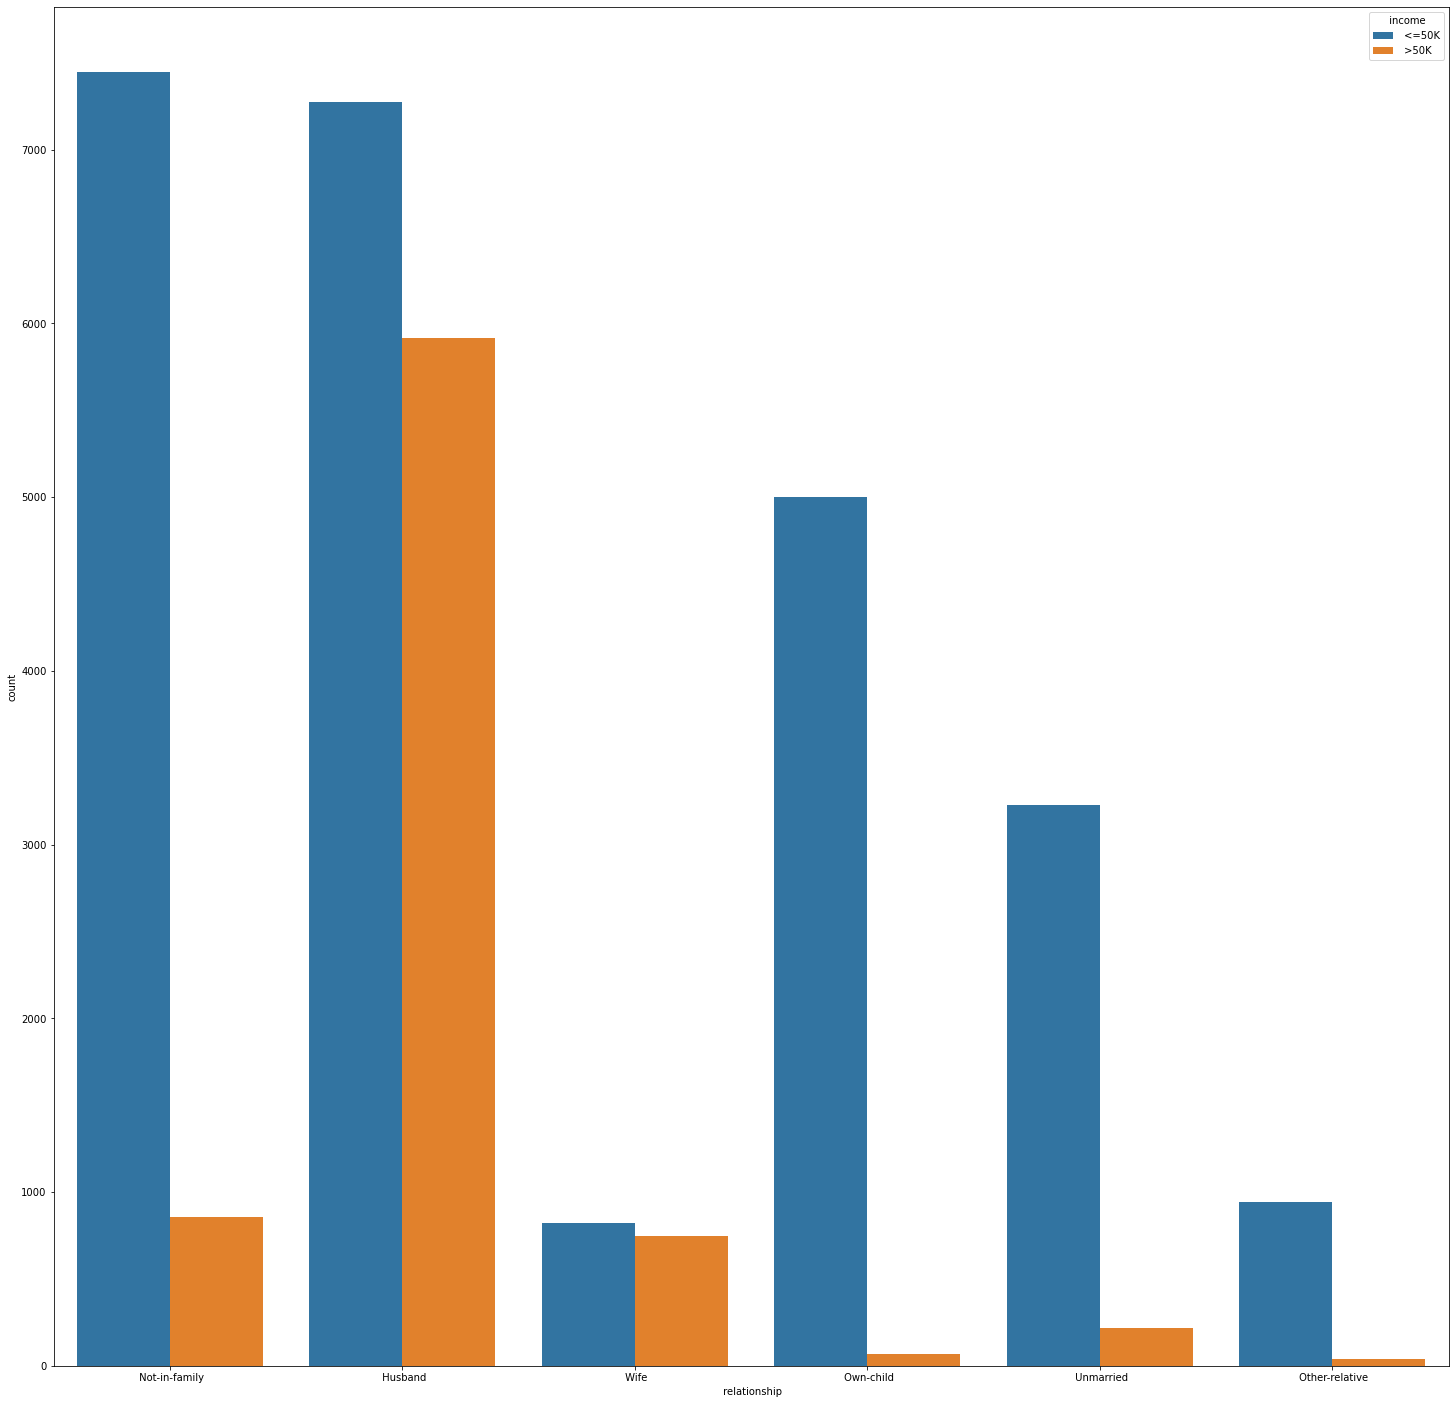

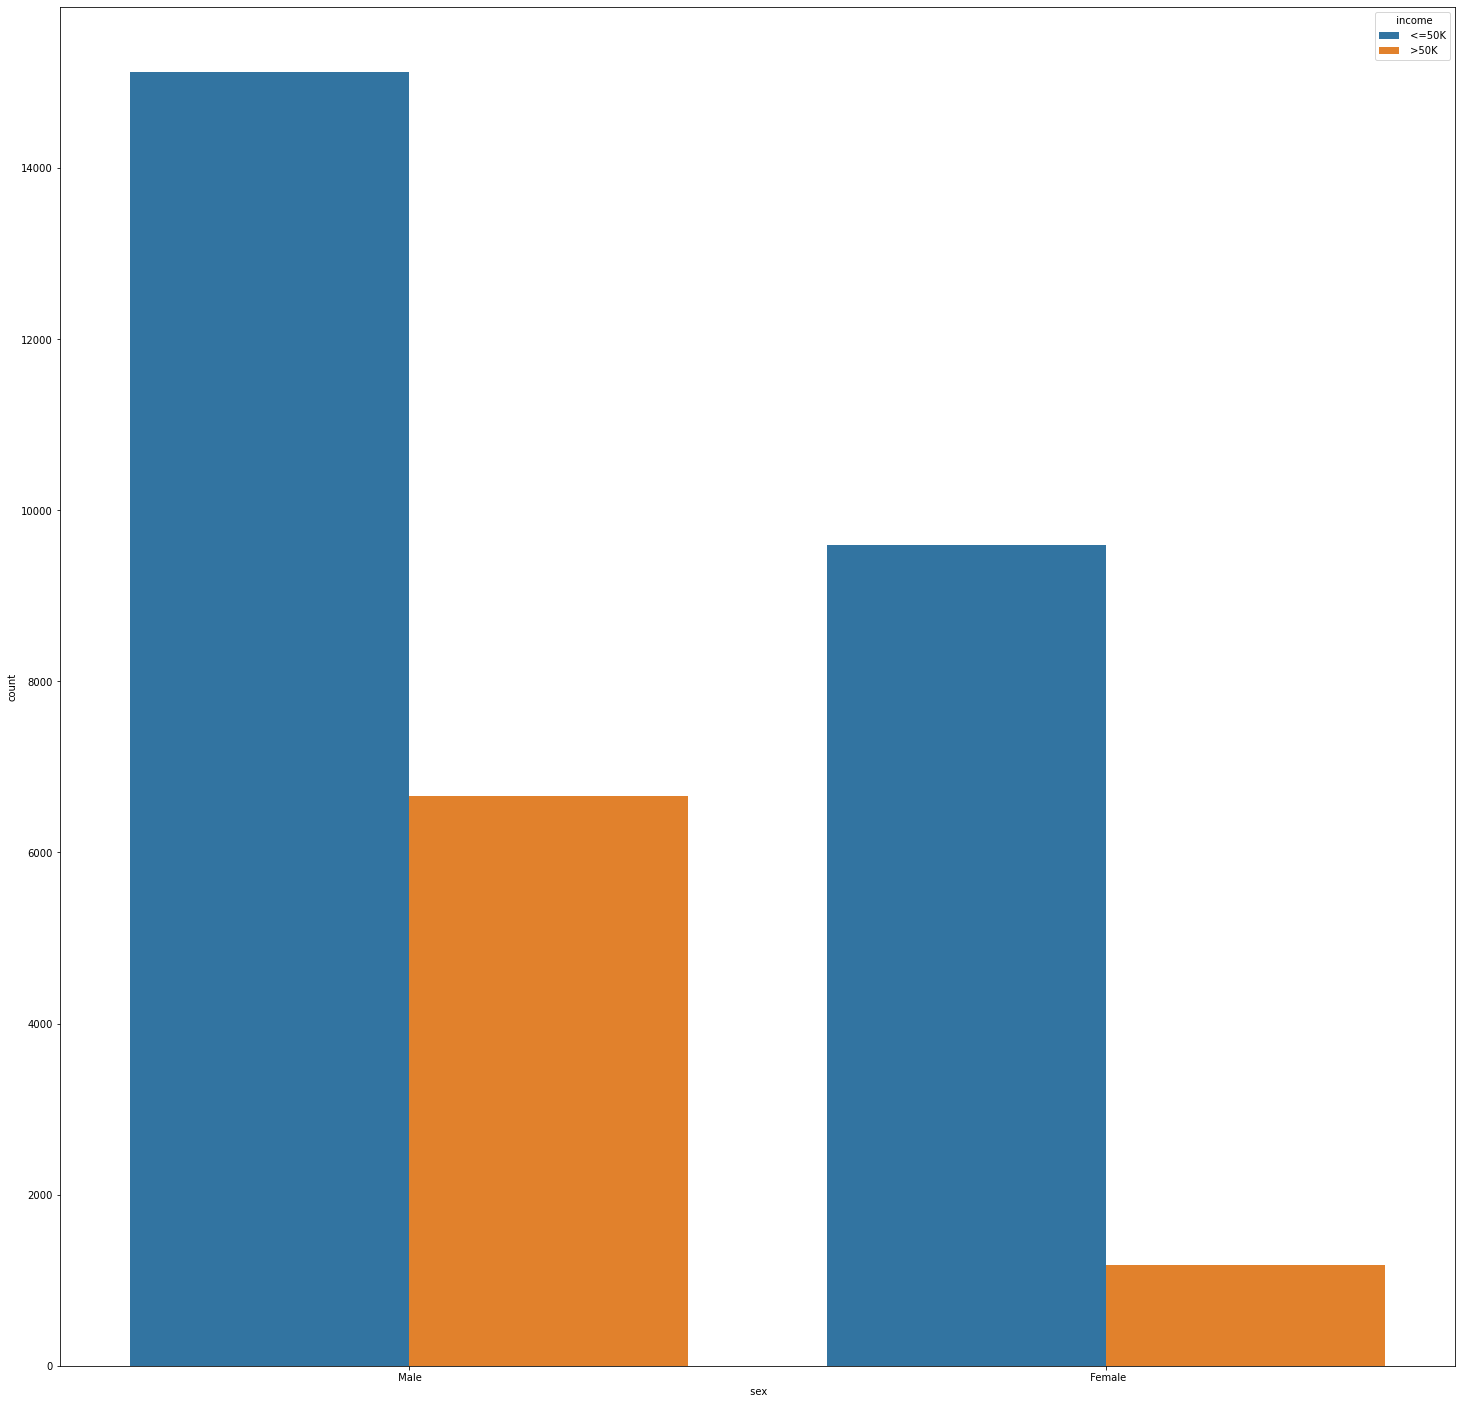

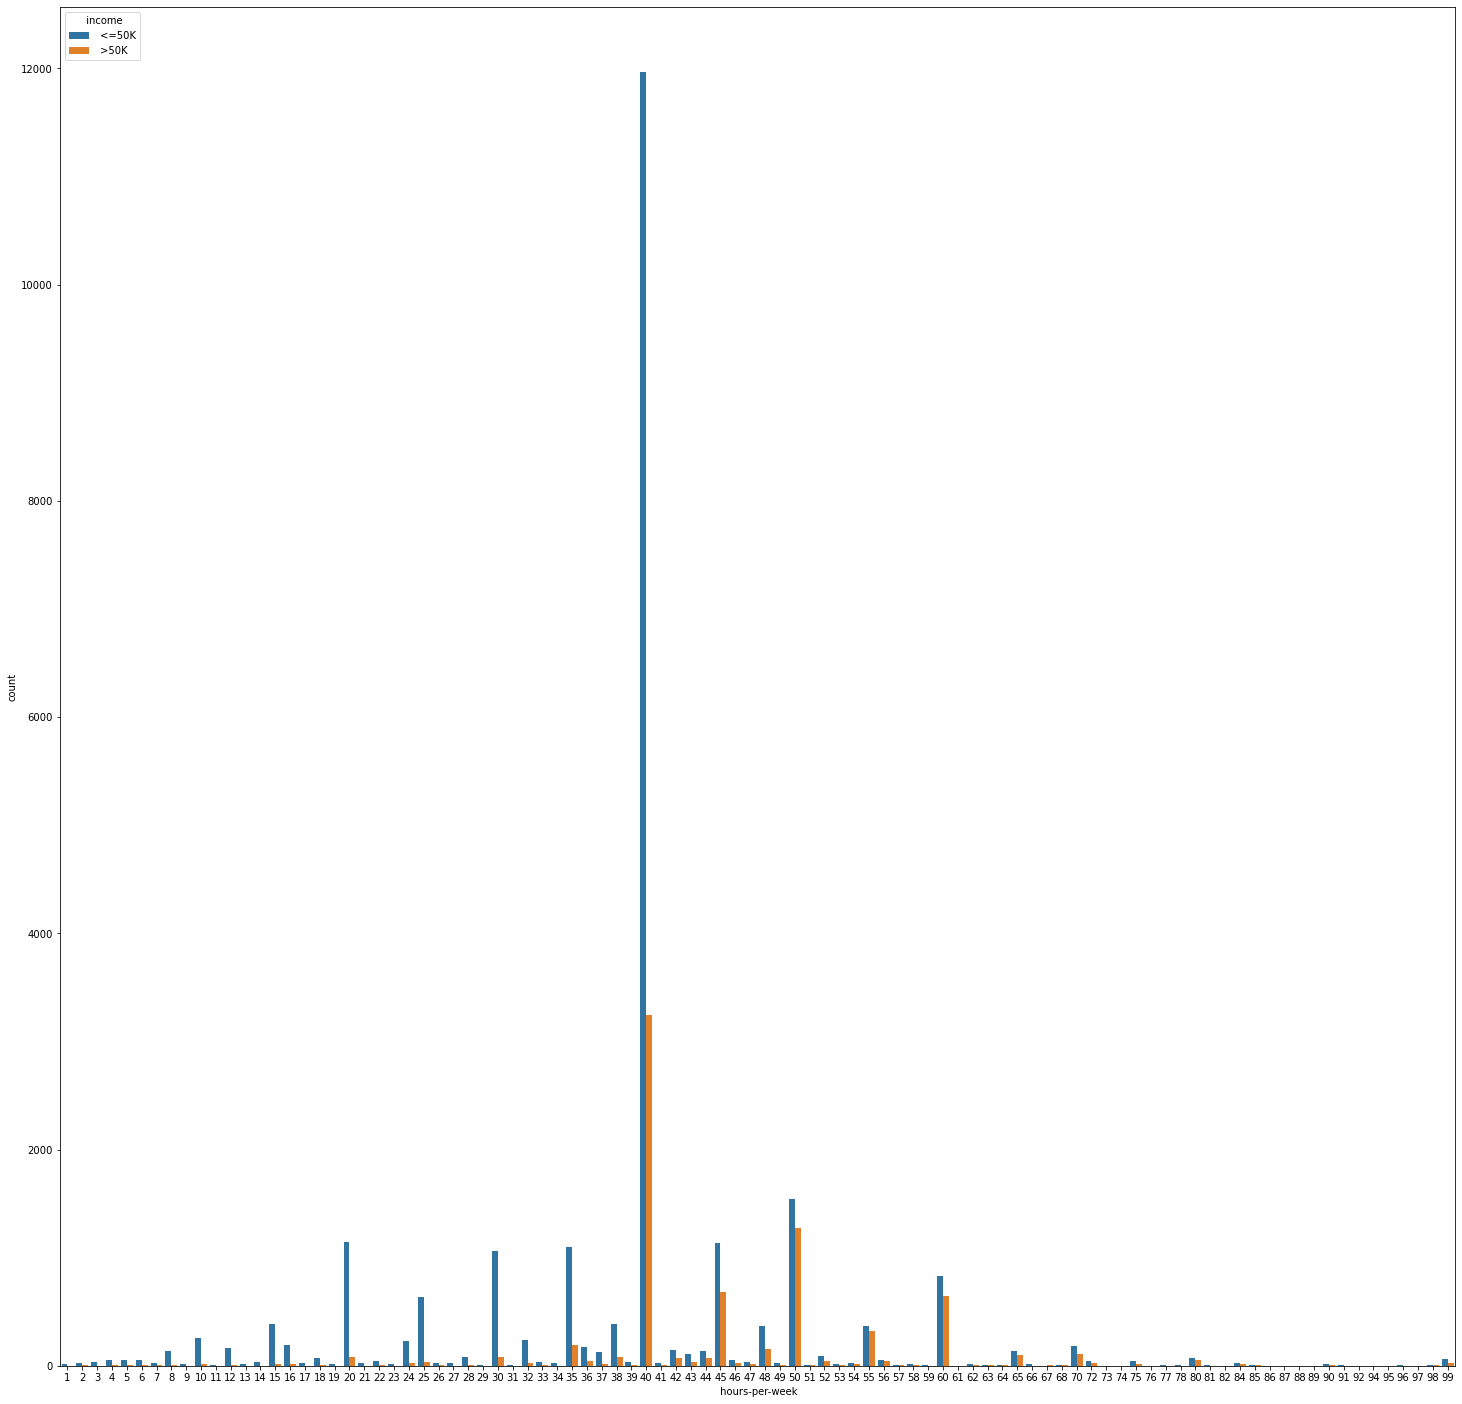

In [4]:
for column in data.columns:
    if(column != ' fnlwgt' and column != ' capital-gain' and column != ' income'):
        fig, (axi) = plt.subplots(figsize=(25, 25), ncols=1, sharex=True, sharey=True)
        sns.countplot(x = data[column], hue = data[' income'], ax = axi)

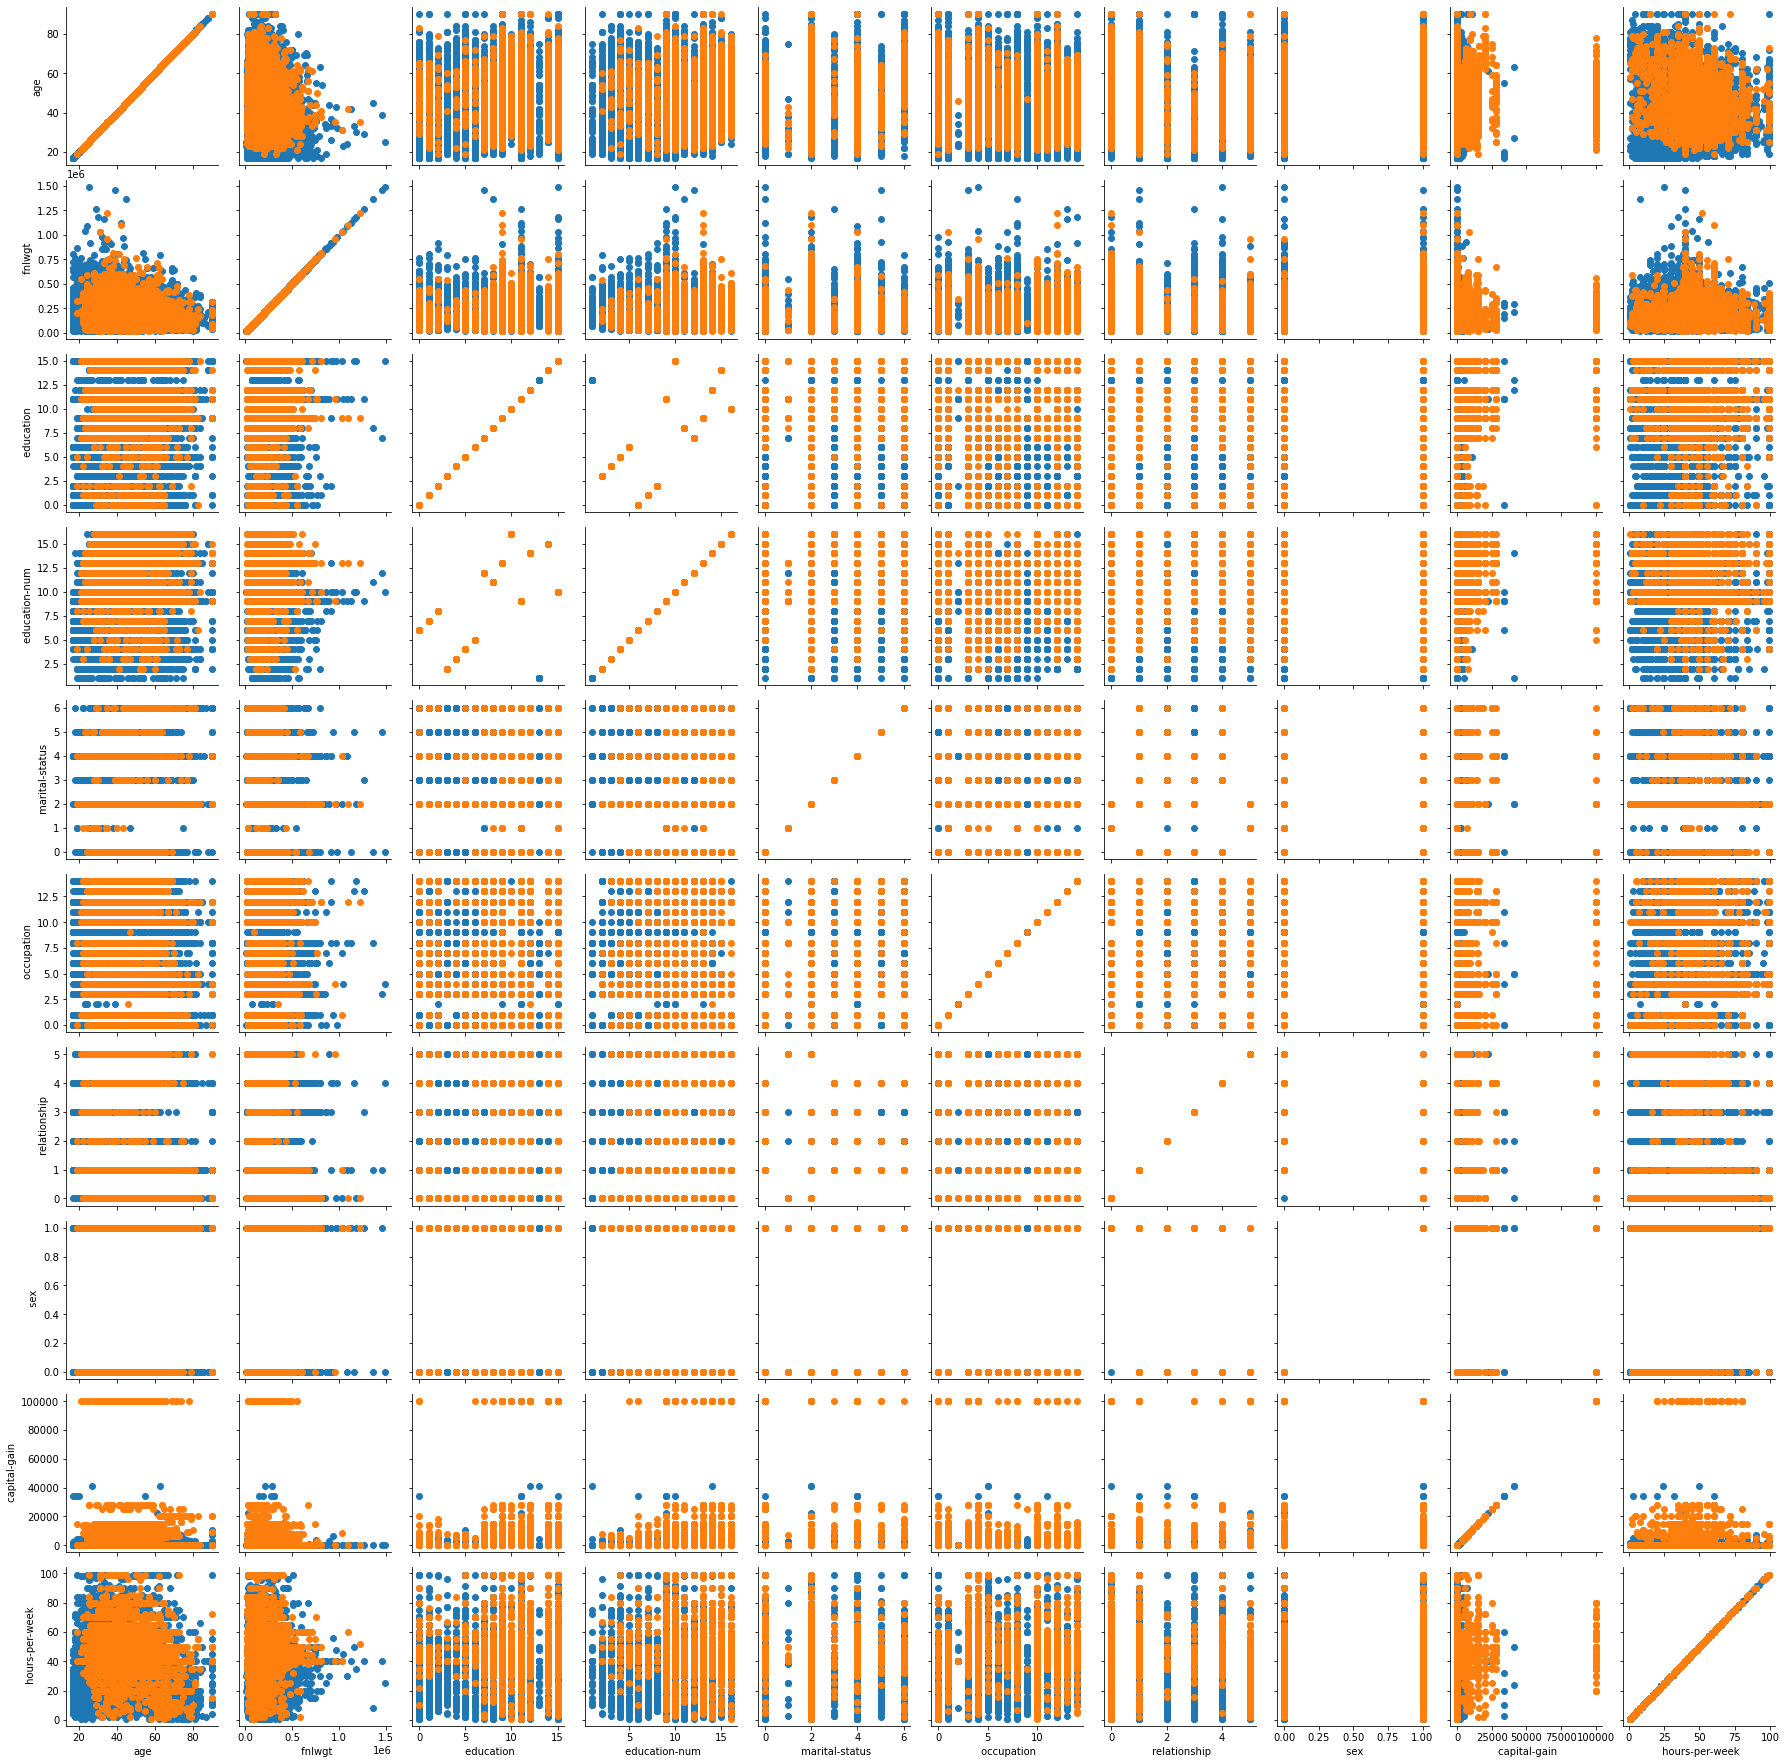

In [5]:
label = preprocessing.LabelEncoder() 
for column in data.columns:
    if(data[column].dtype == object):    
        data[column]= label.fit_transform(data[column])
#строим график, который показывает как признаки коррелируют друг с другом
figsize(25, 25)
df_for_pairgrid = data[['age', ' fnlwgt', ' education', ' education-num', ' marital-status', ' occupation', ' relationship', ' sex', ' capital-gain', ' hours-per-week', ' income']]
sns.PairGrid(df_for_pairgrid, hue=' income').map(plt.scatter)

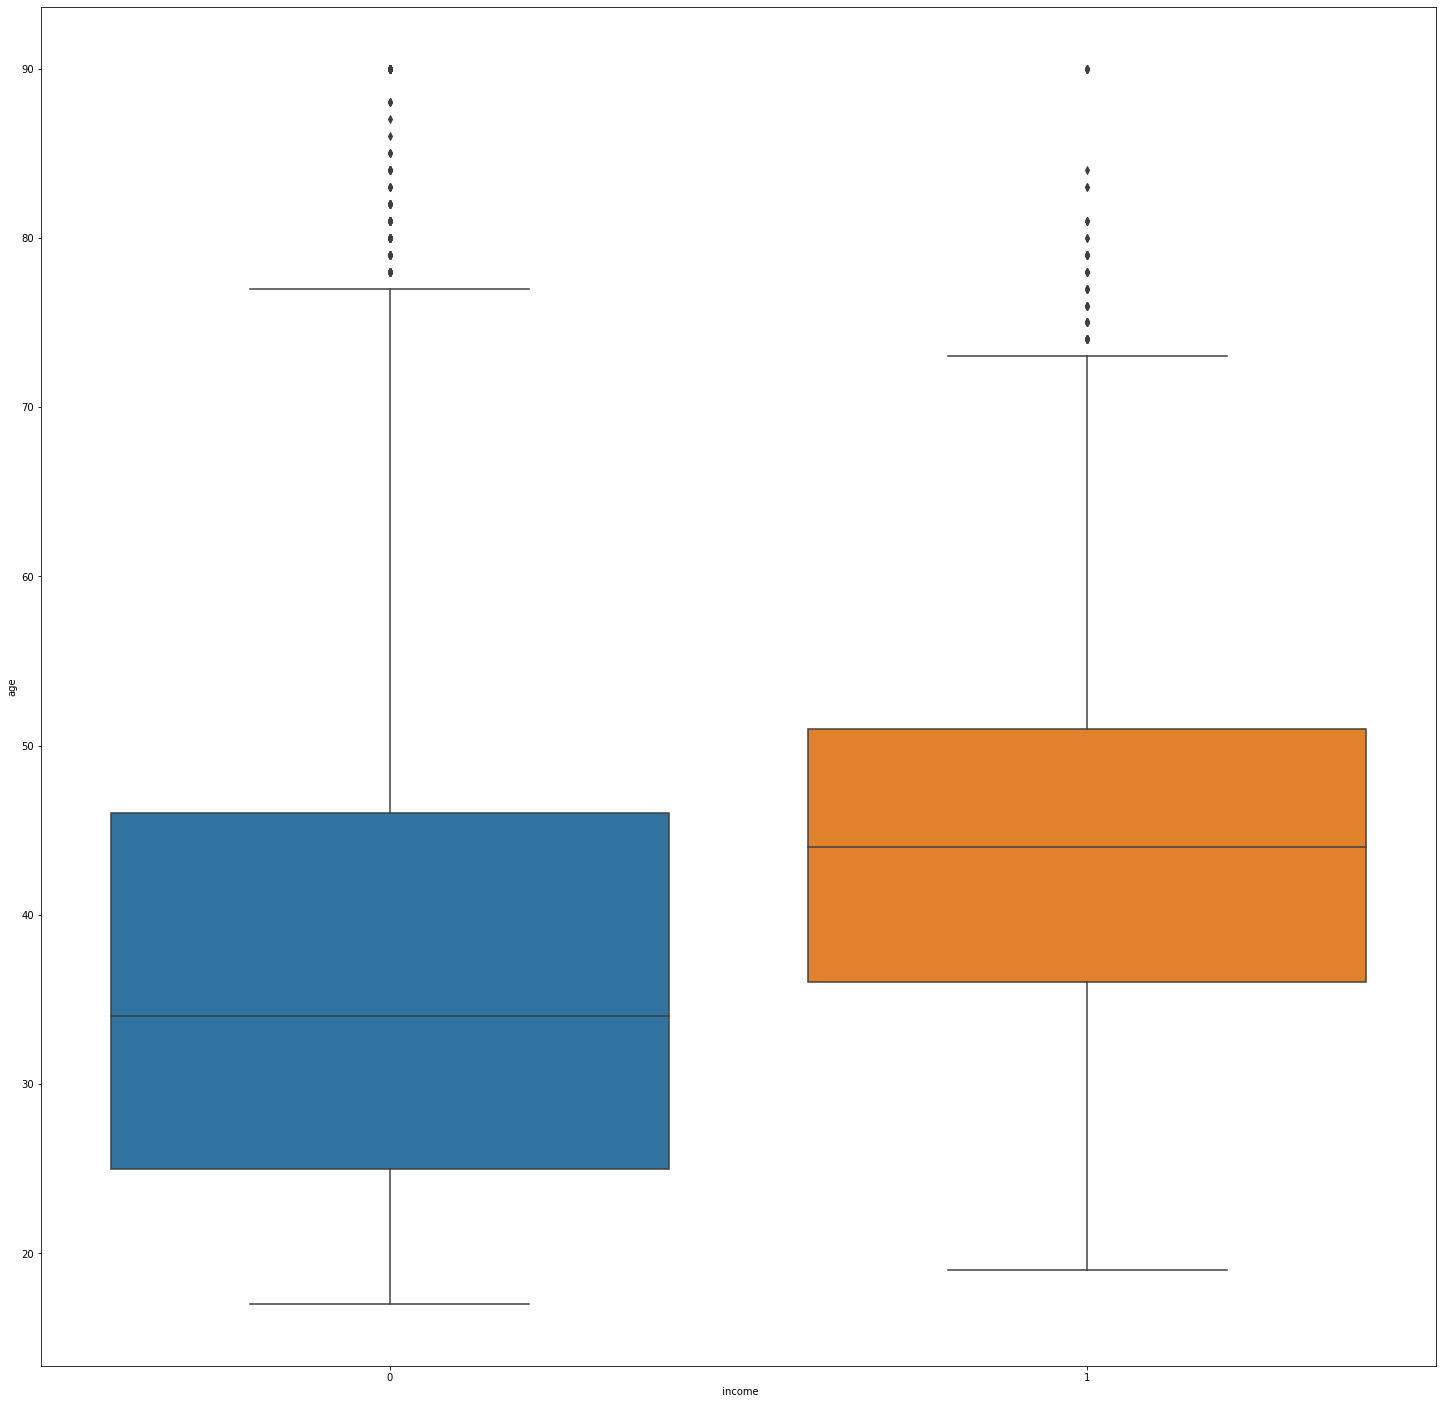

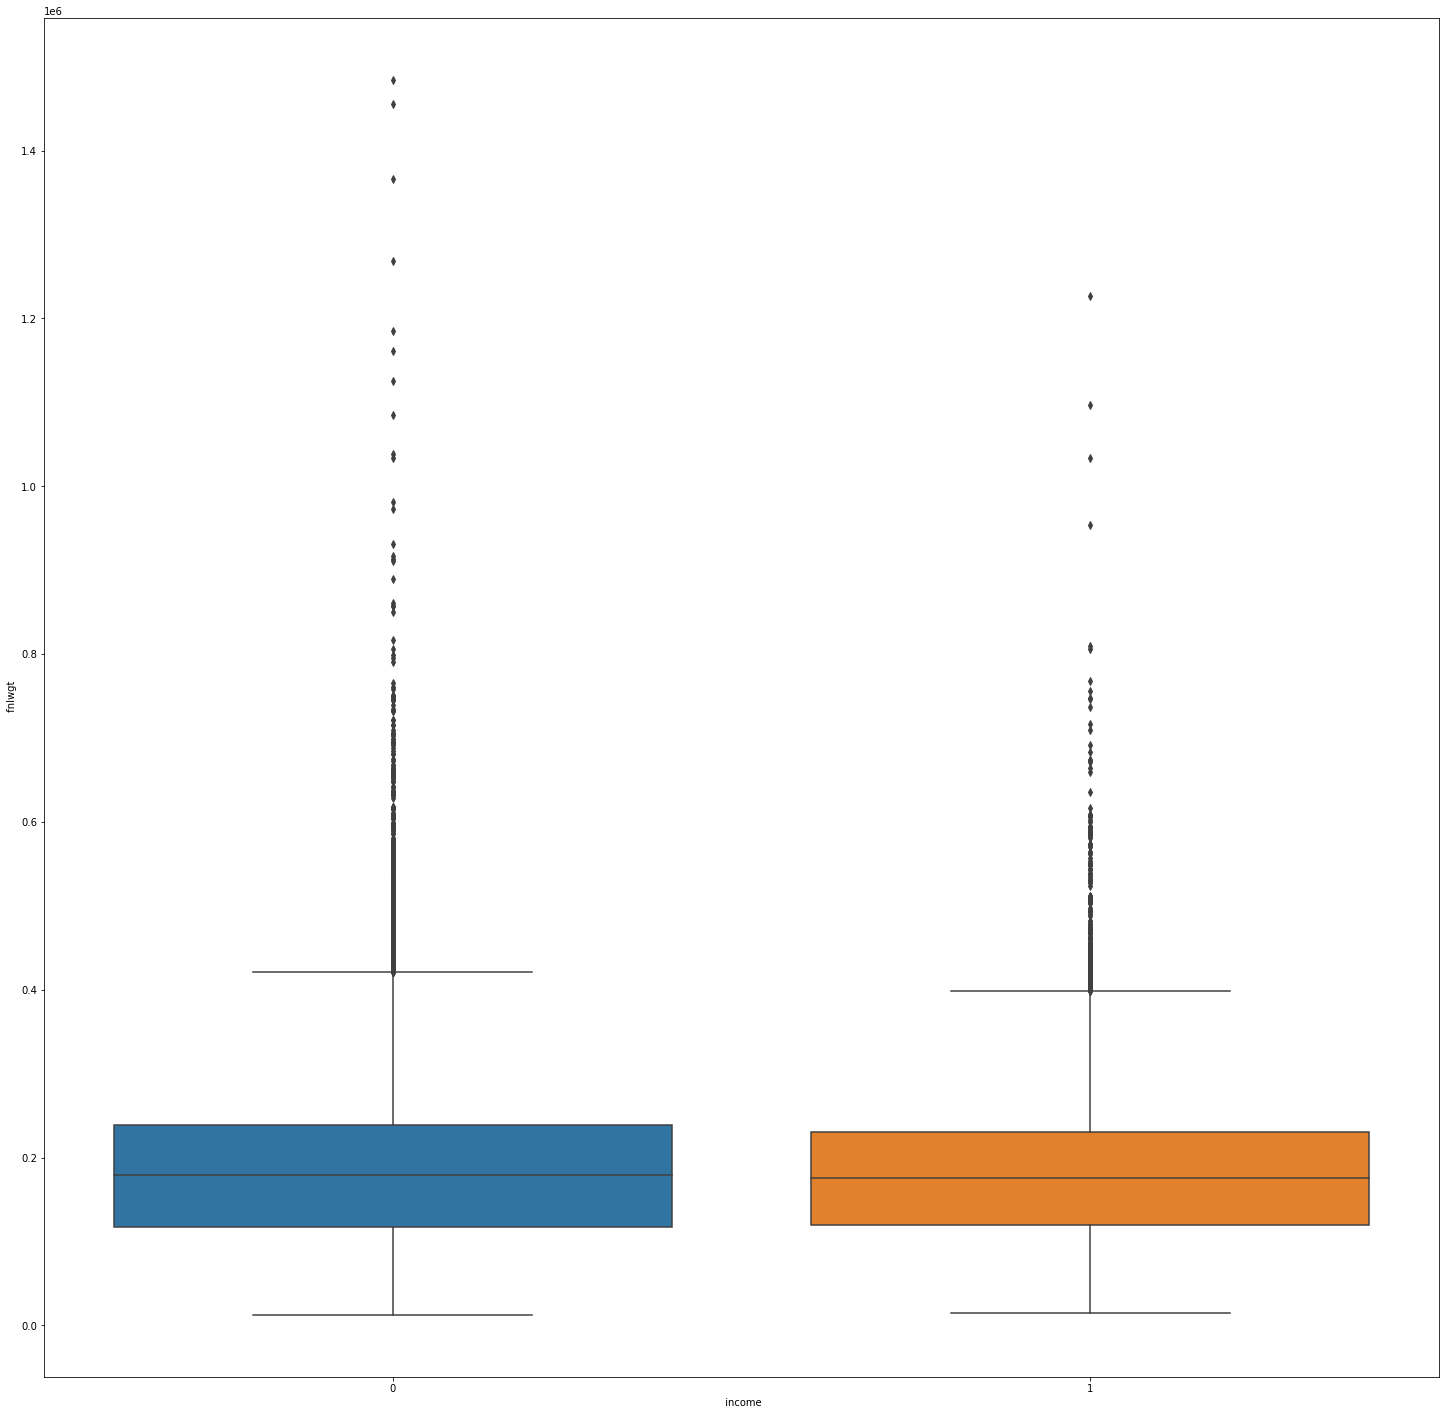

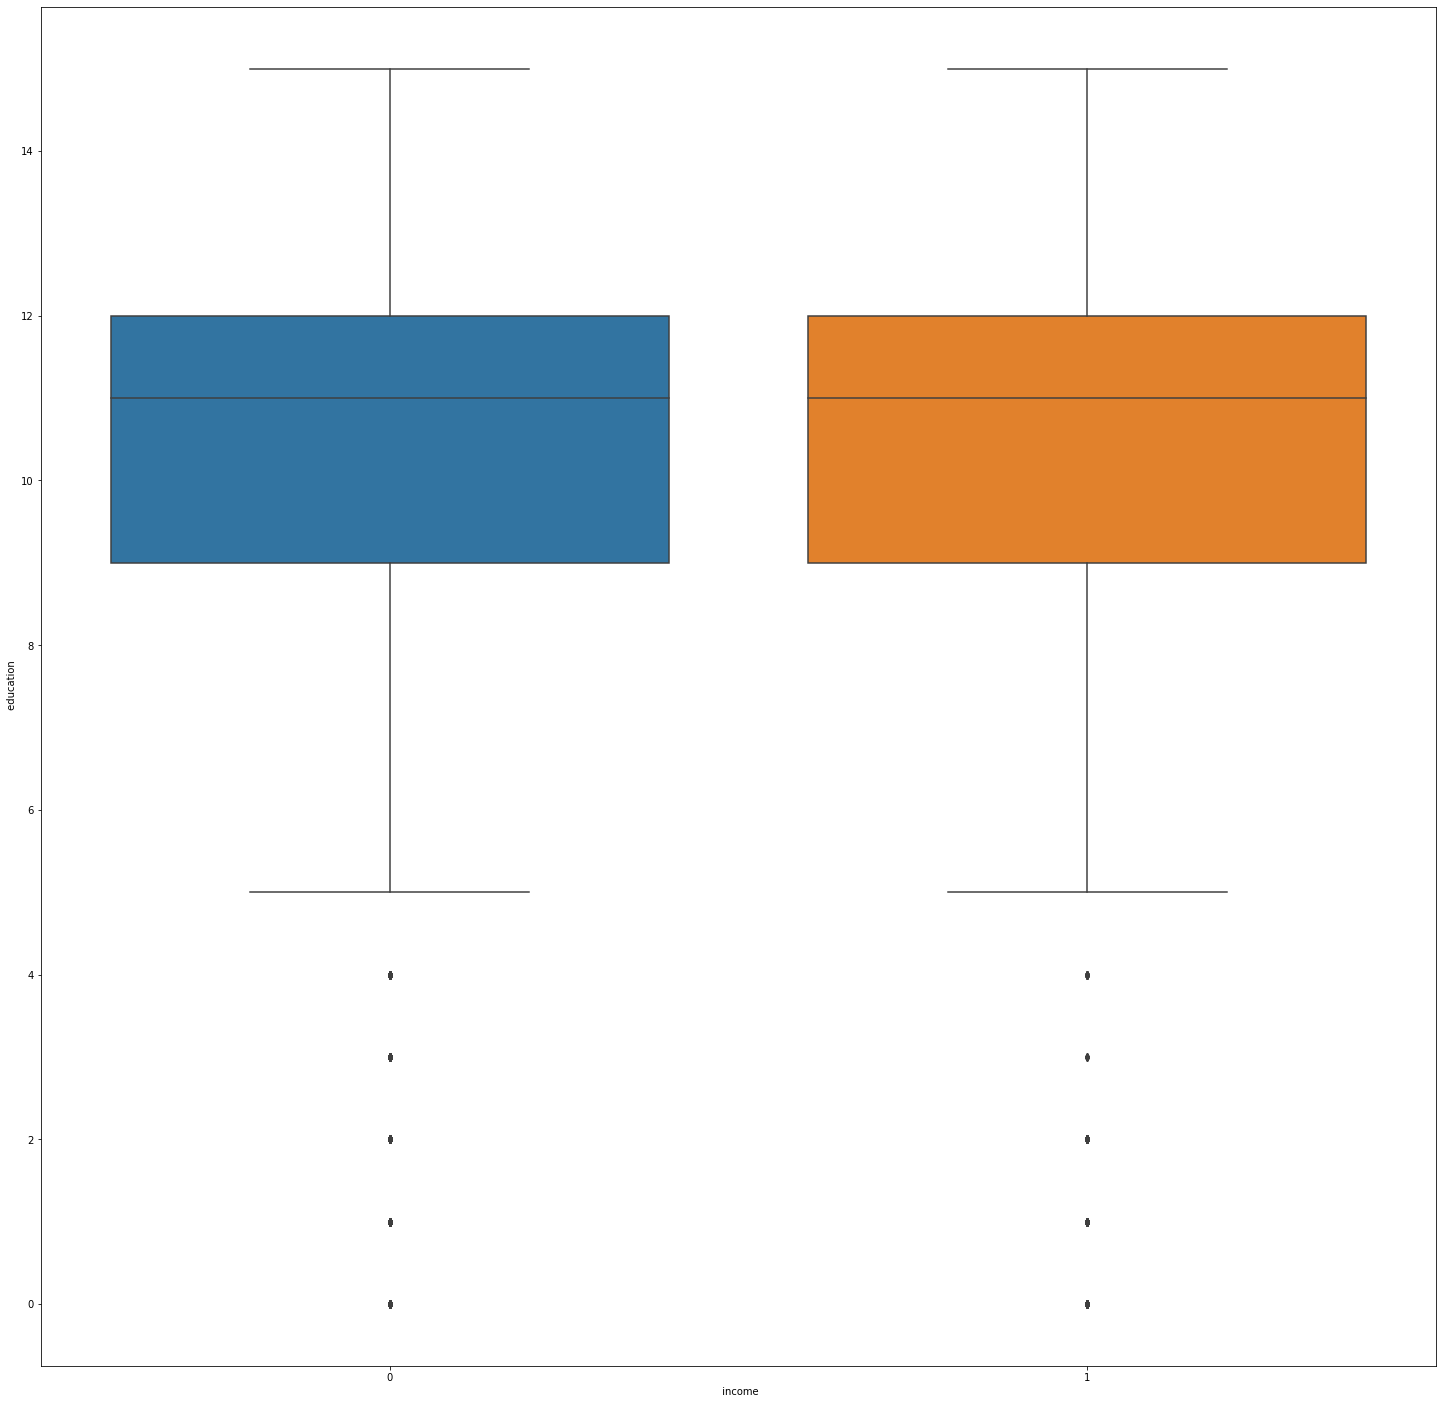

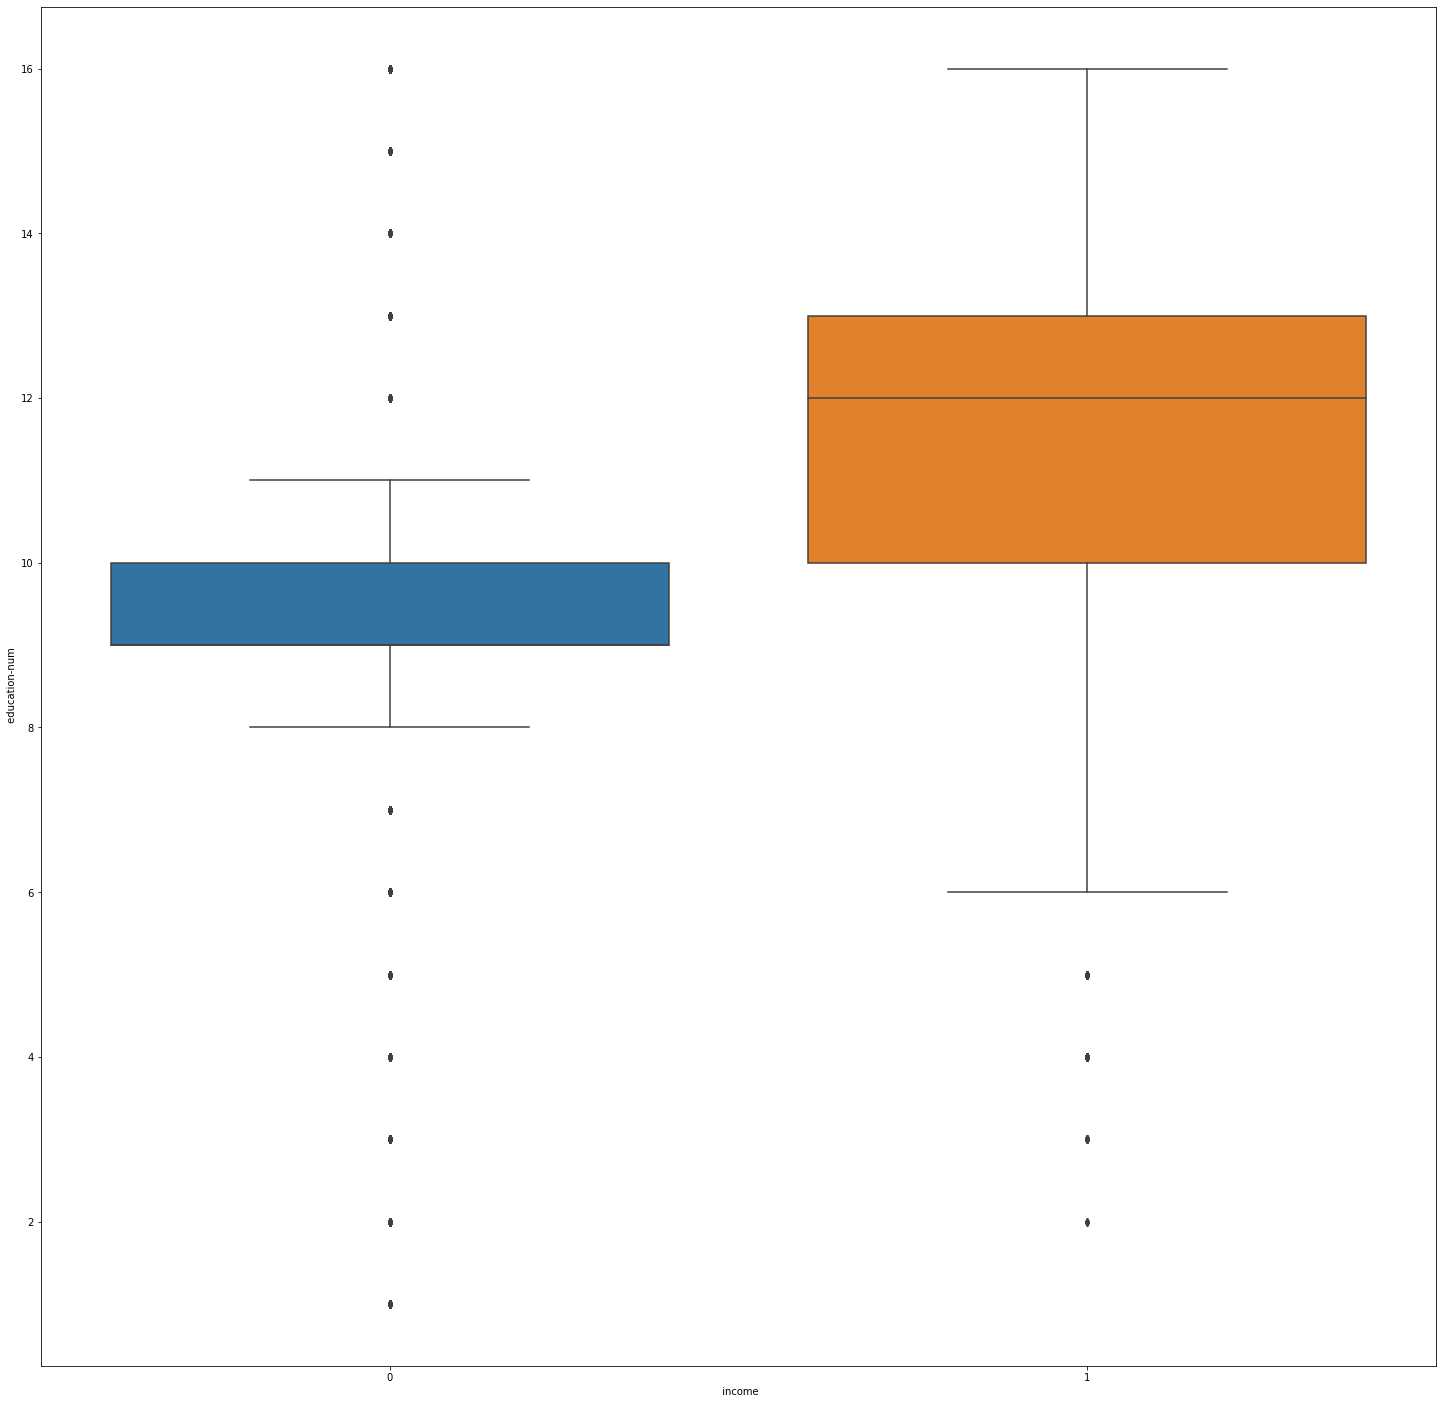

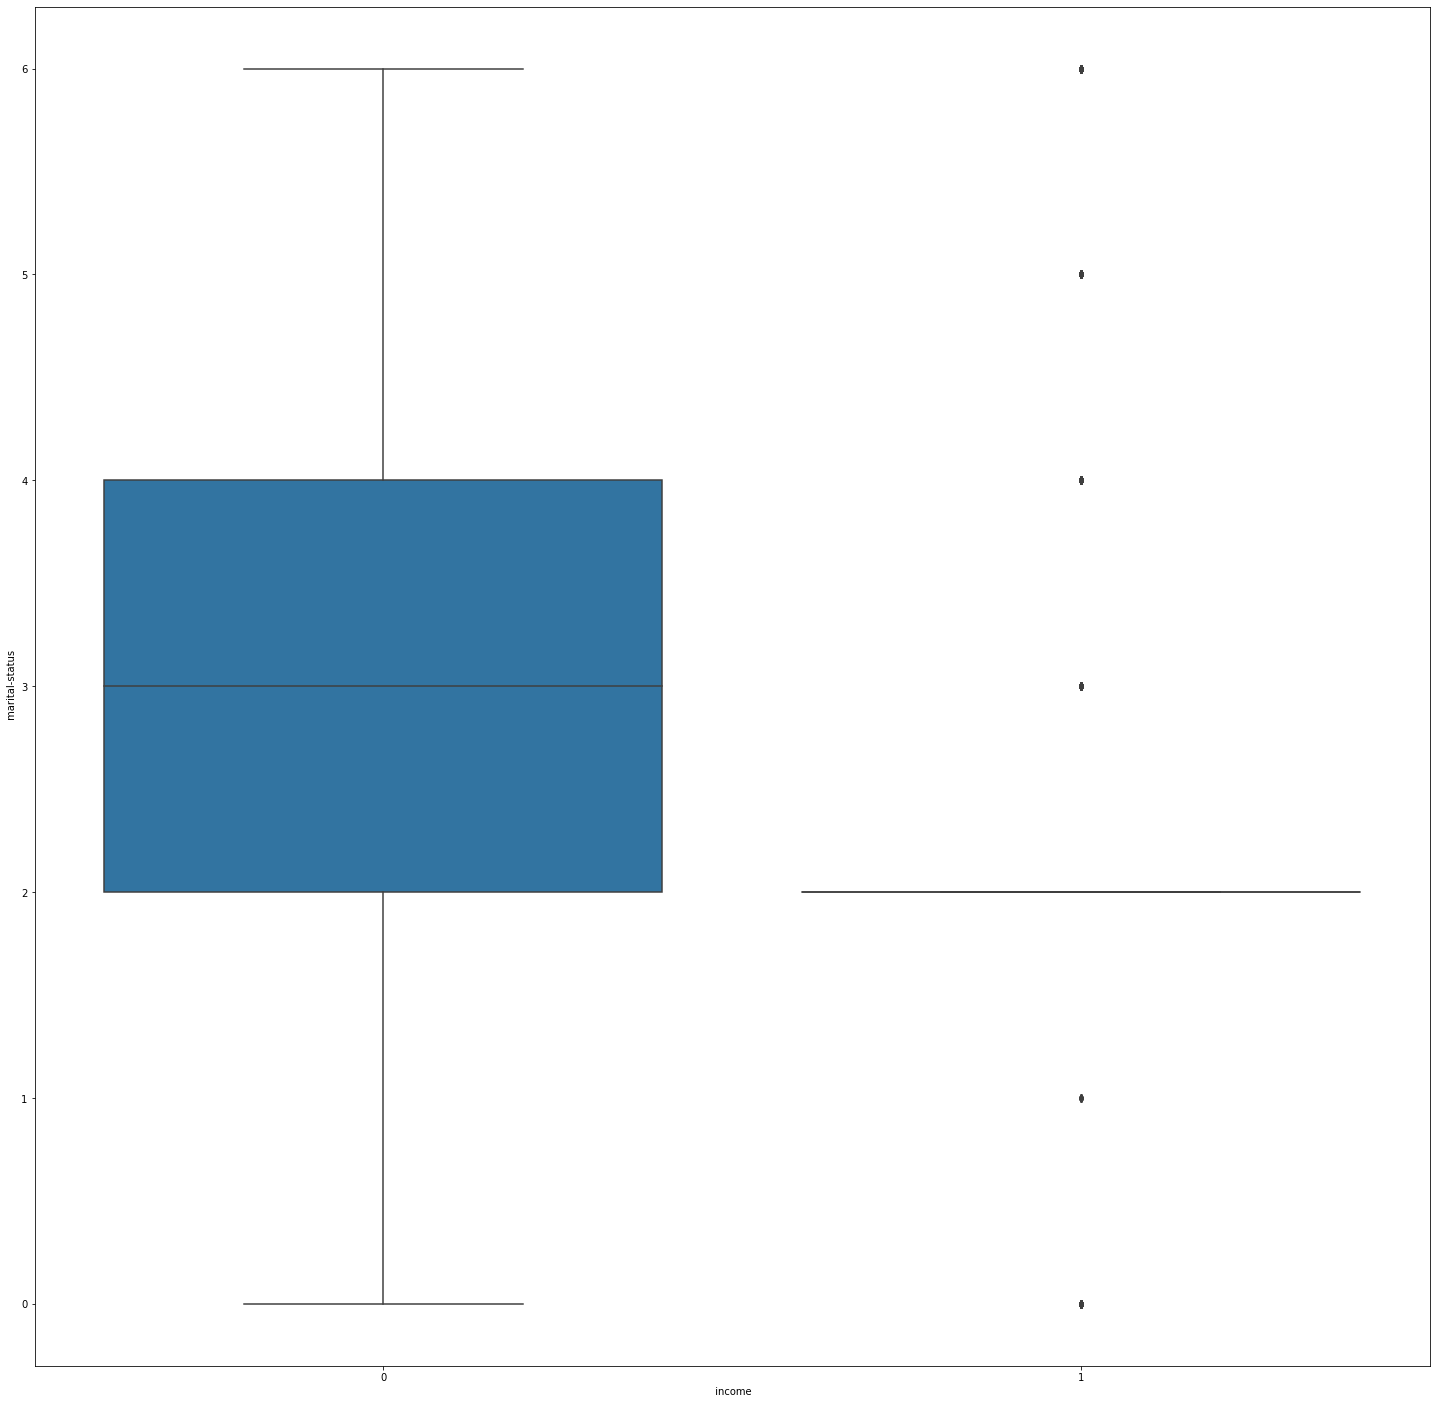

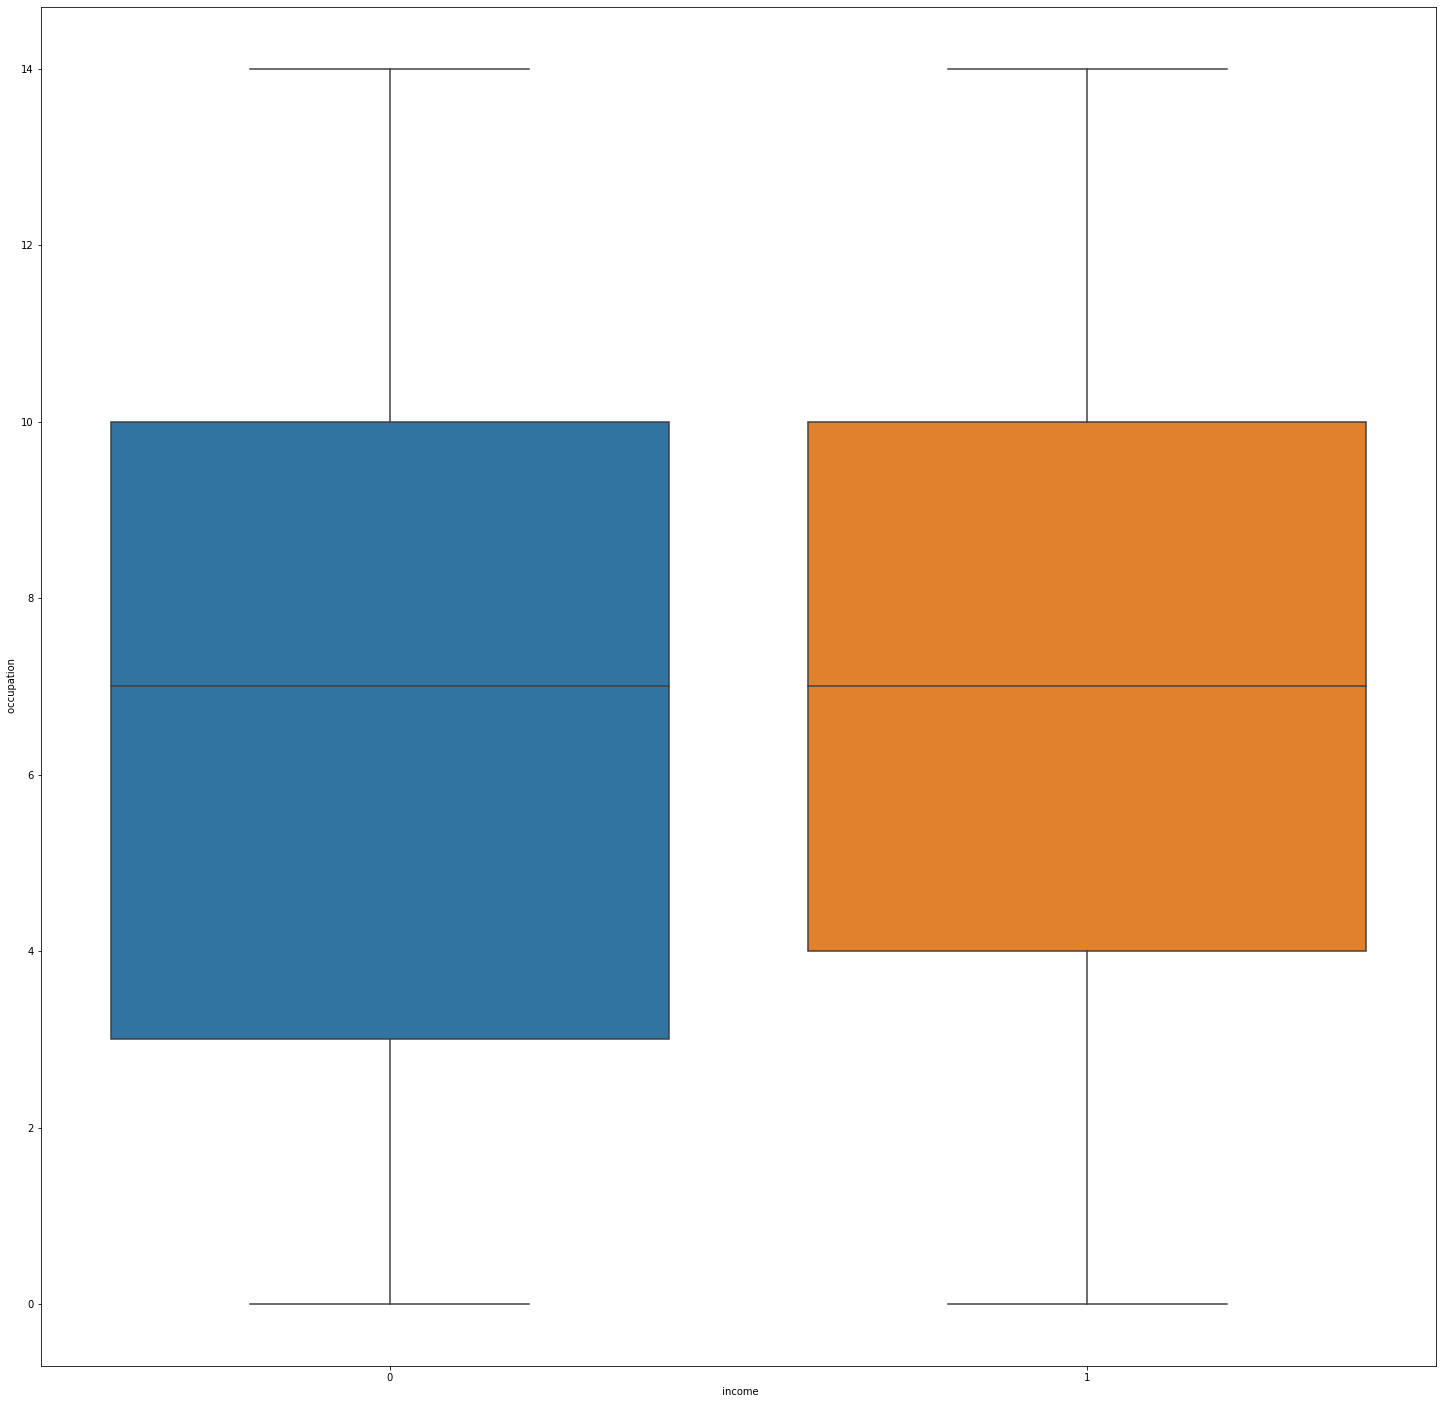

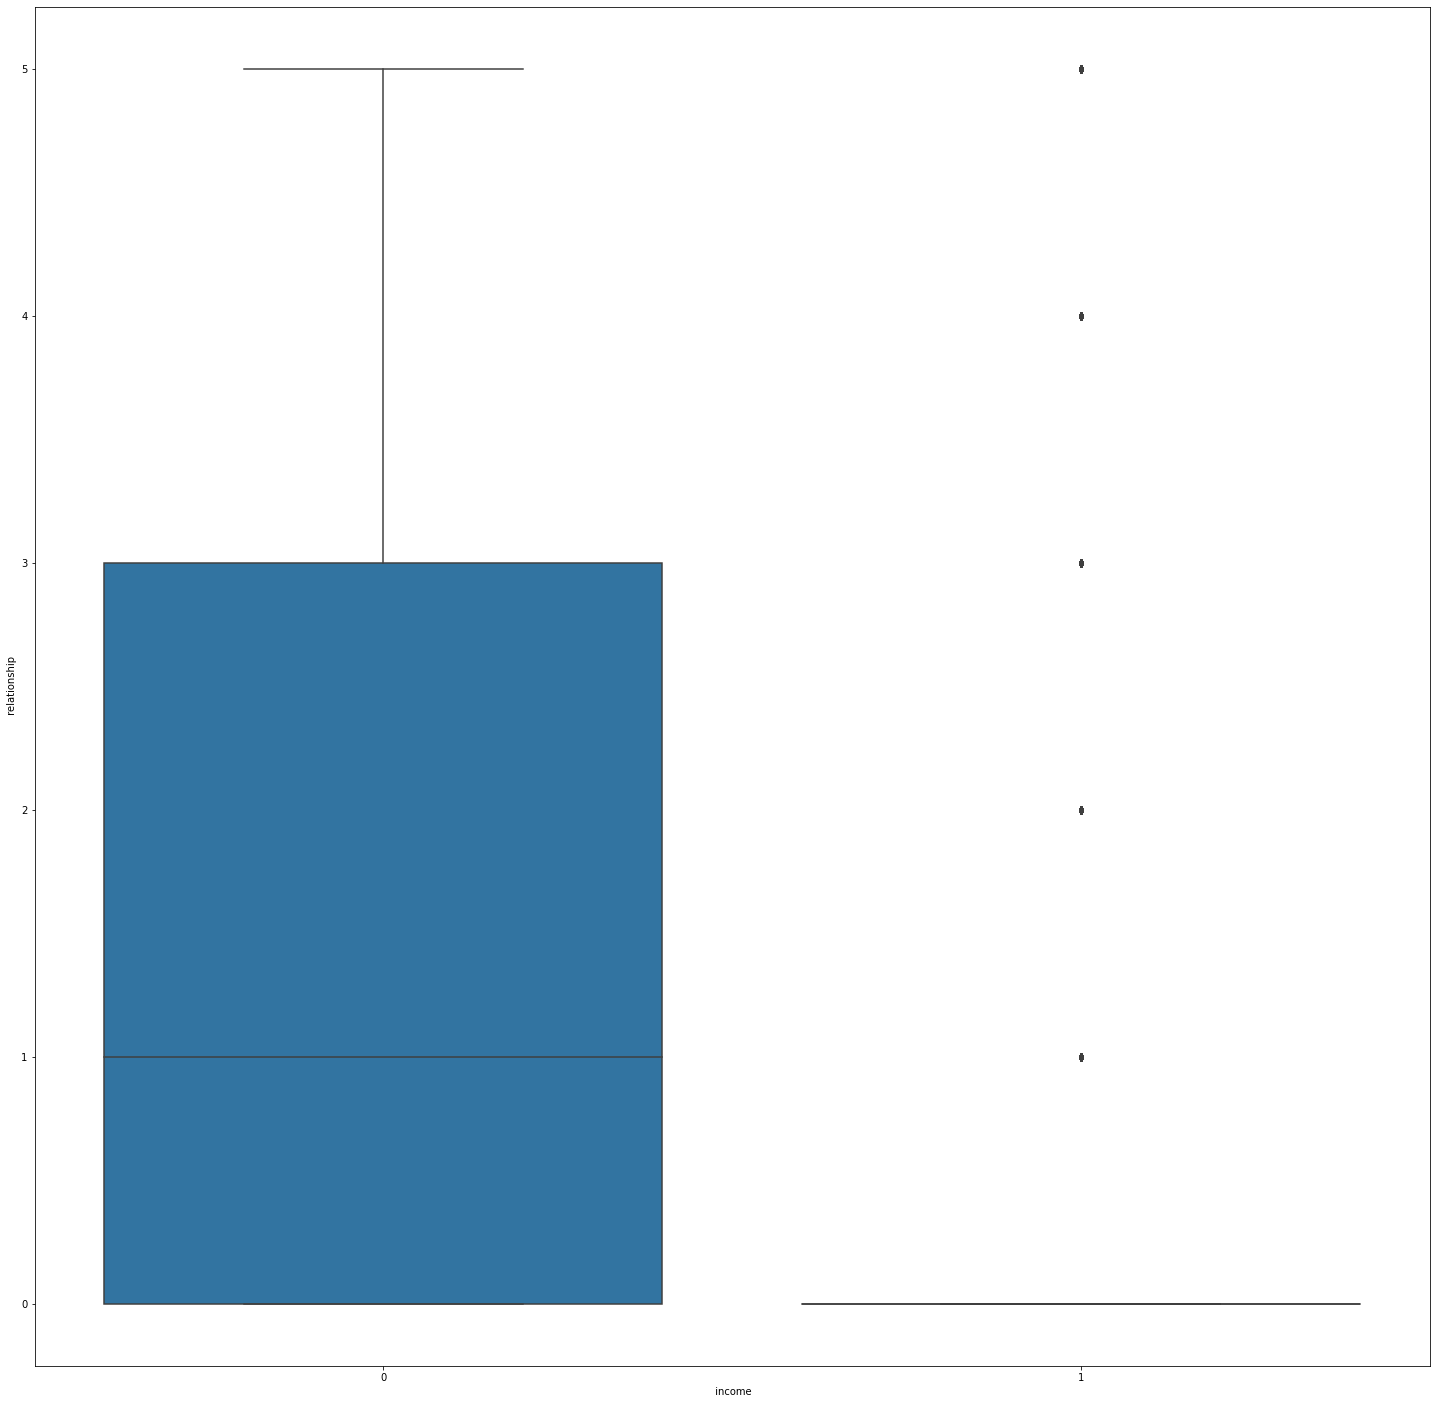

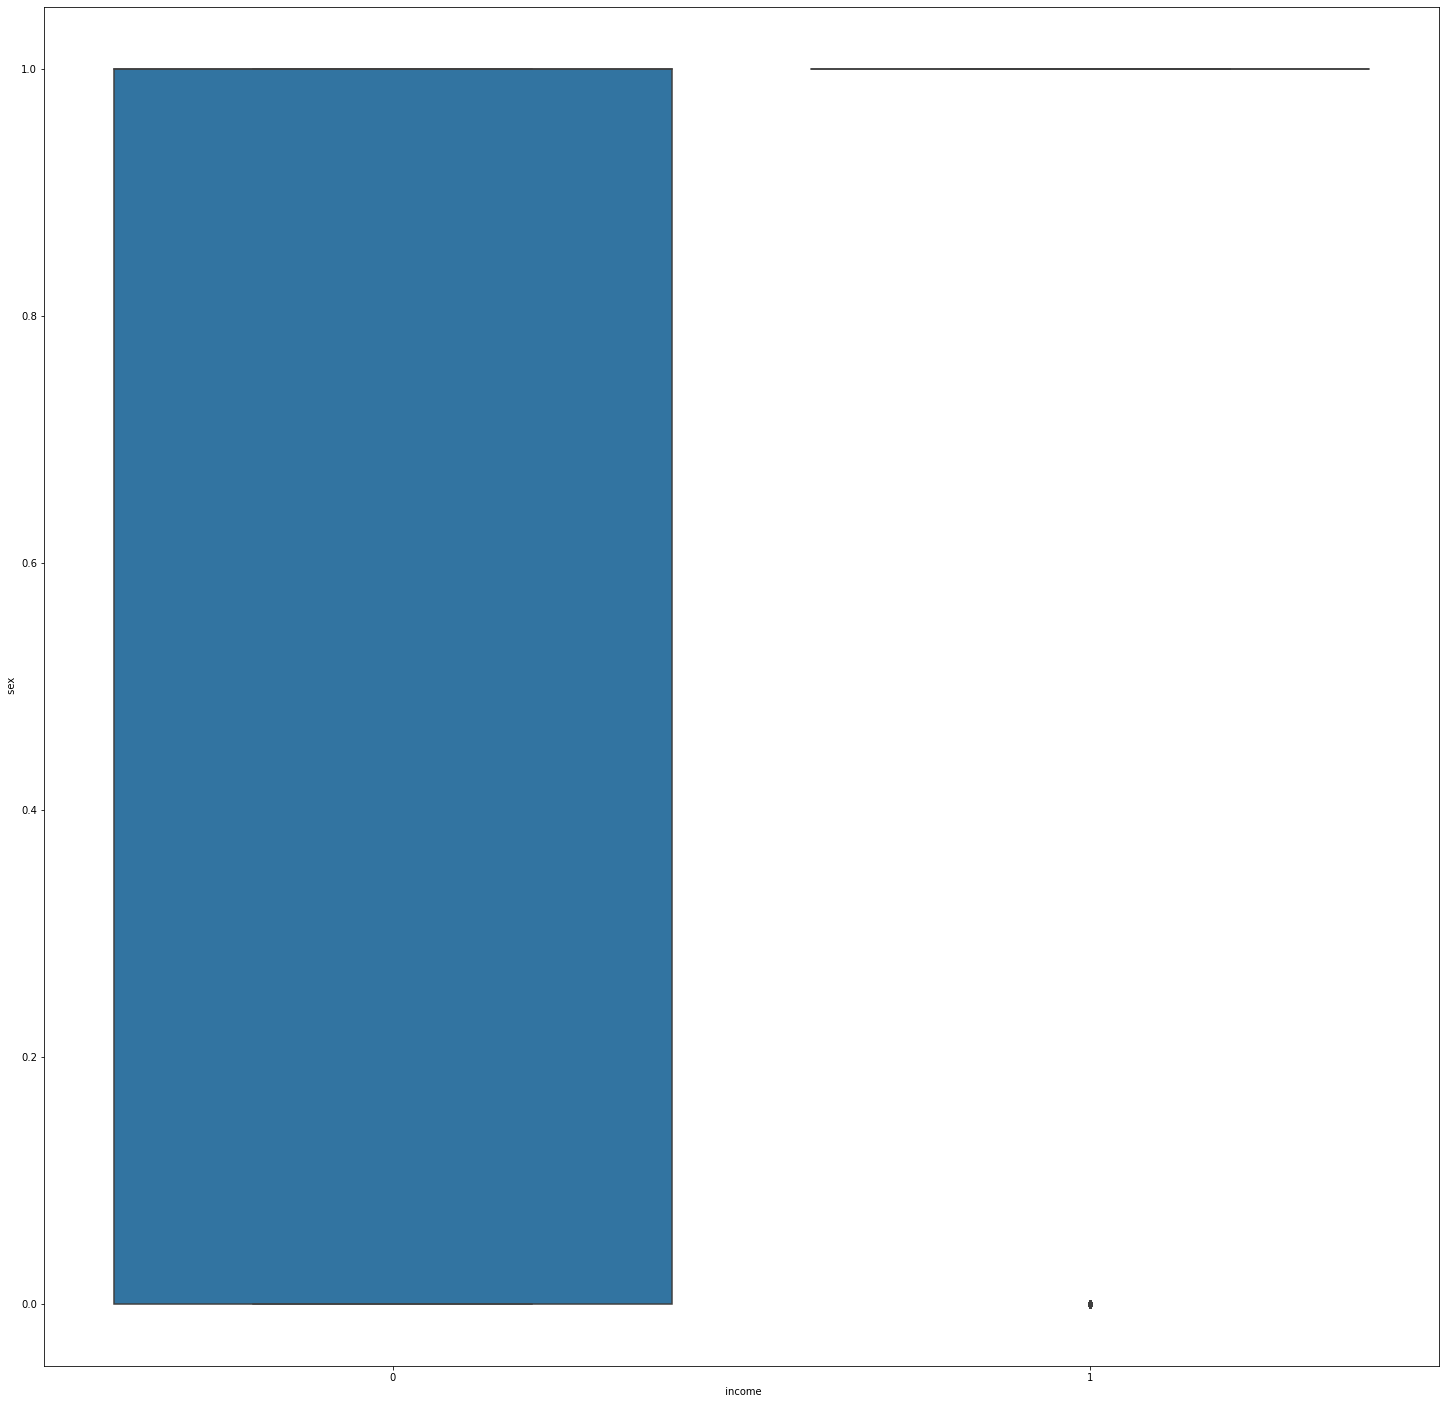

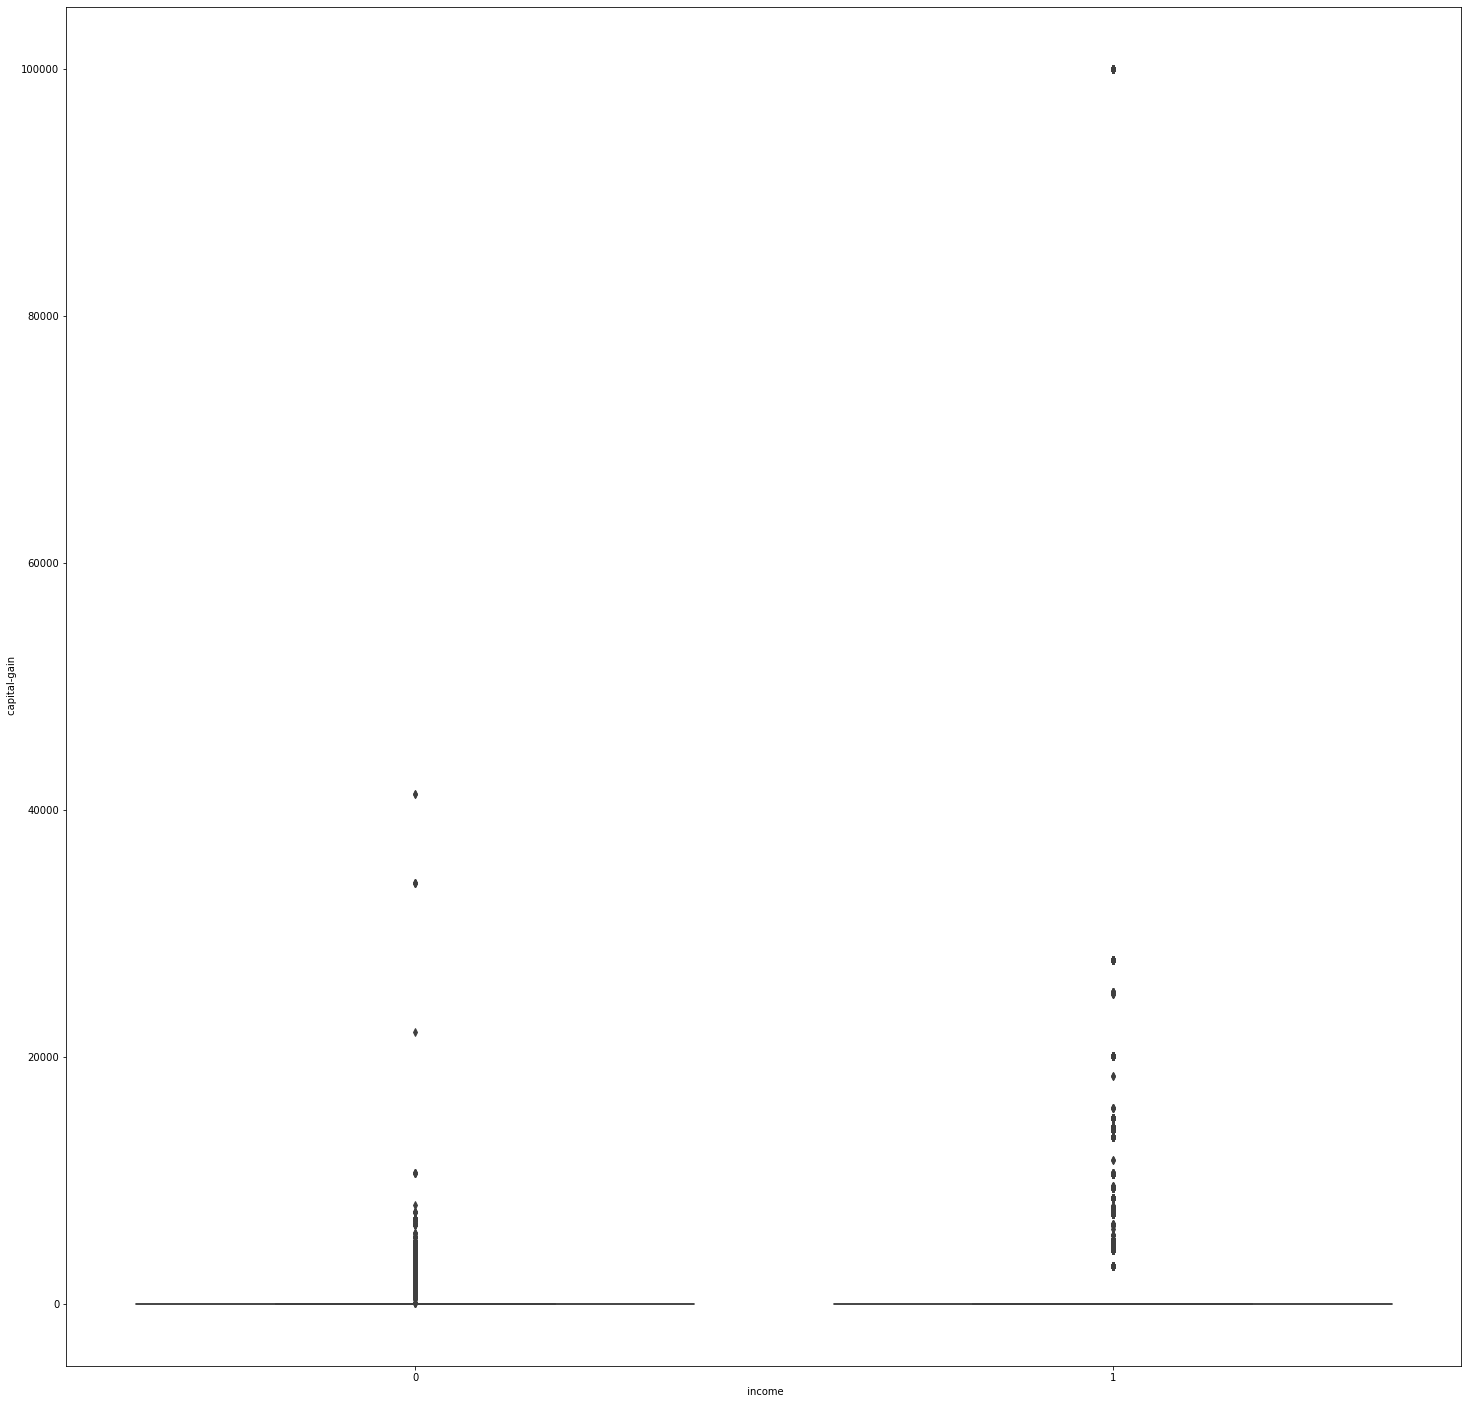

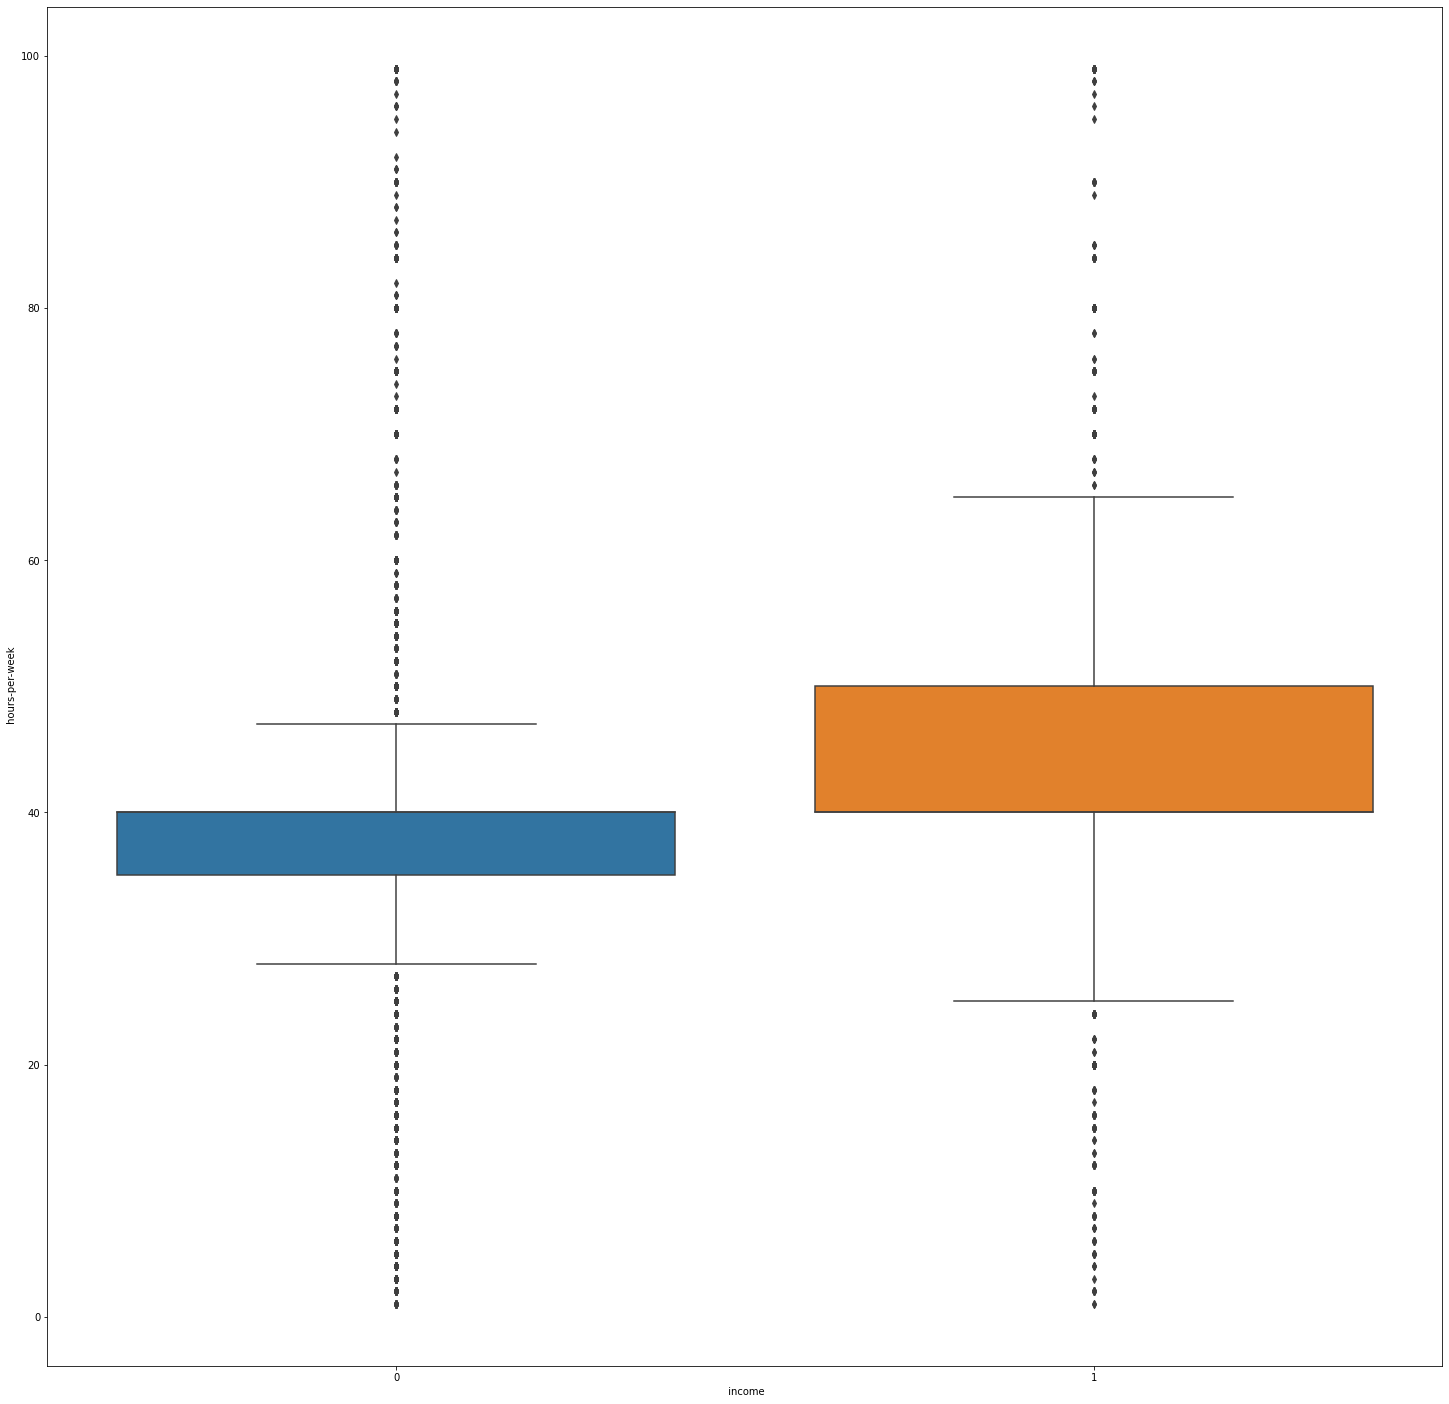

In [7]:
#строим графики для проверки отсутствия анамалий, черта - медиана, 
#квантилиумы - границы, 75 - меньше 75%, 25 - меньше 25%
# выбросы - точки, отклонение больше, чем 3*сигма
for column in data:
    if(column != ' income'):
        fig, (axi) = plt.subplots(figsize=(25, 25), ncols=1, sharex=True, sharey=True)
        sns.boxplot(x = data[' income'], y = data[column], ax = axi)

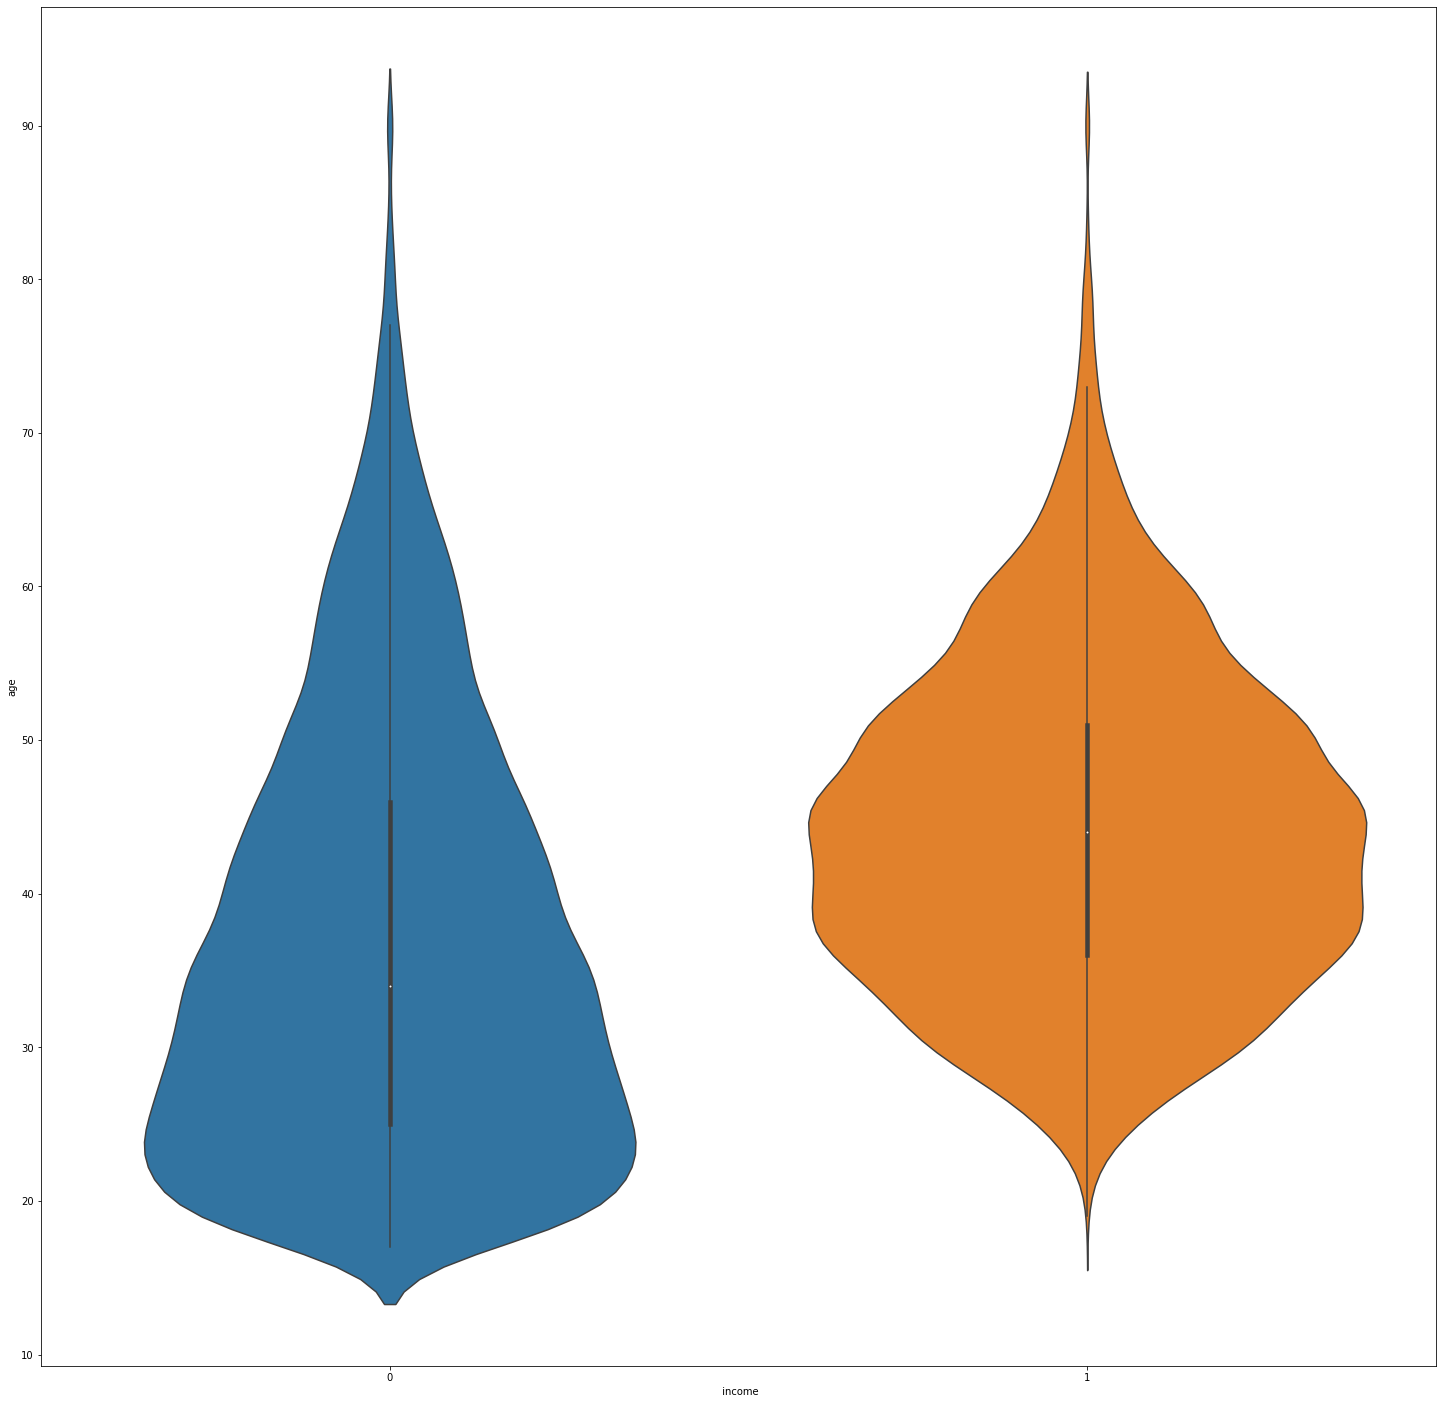

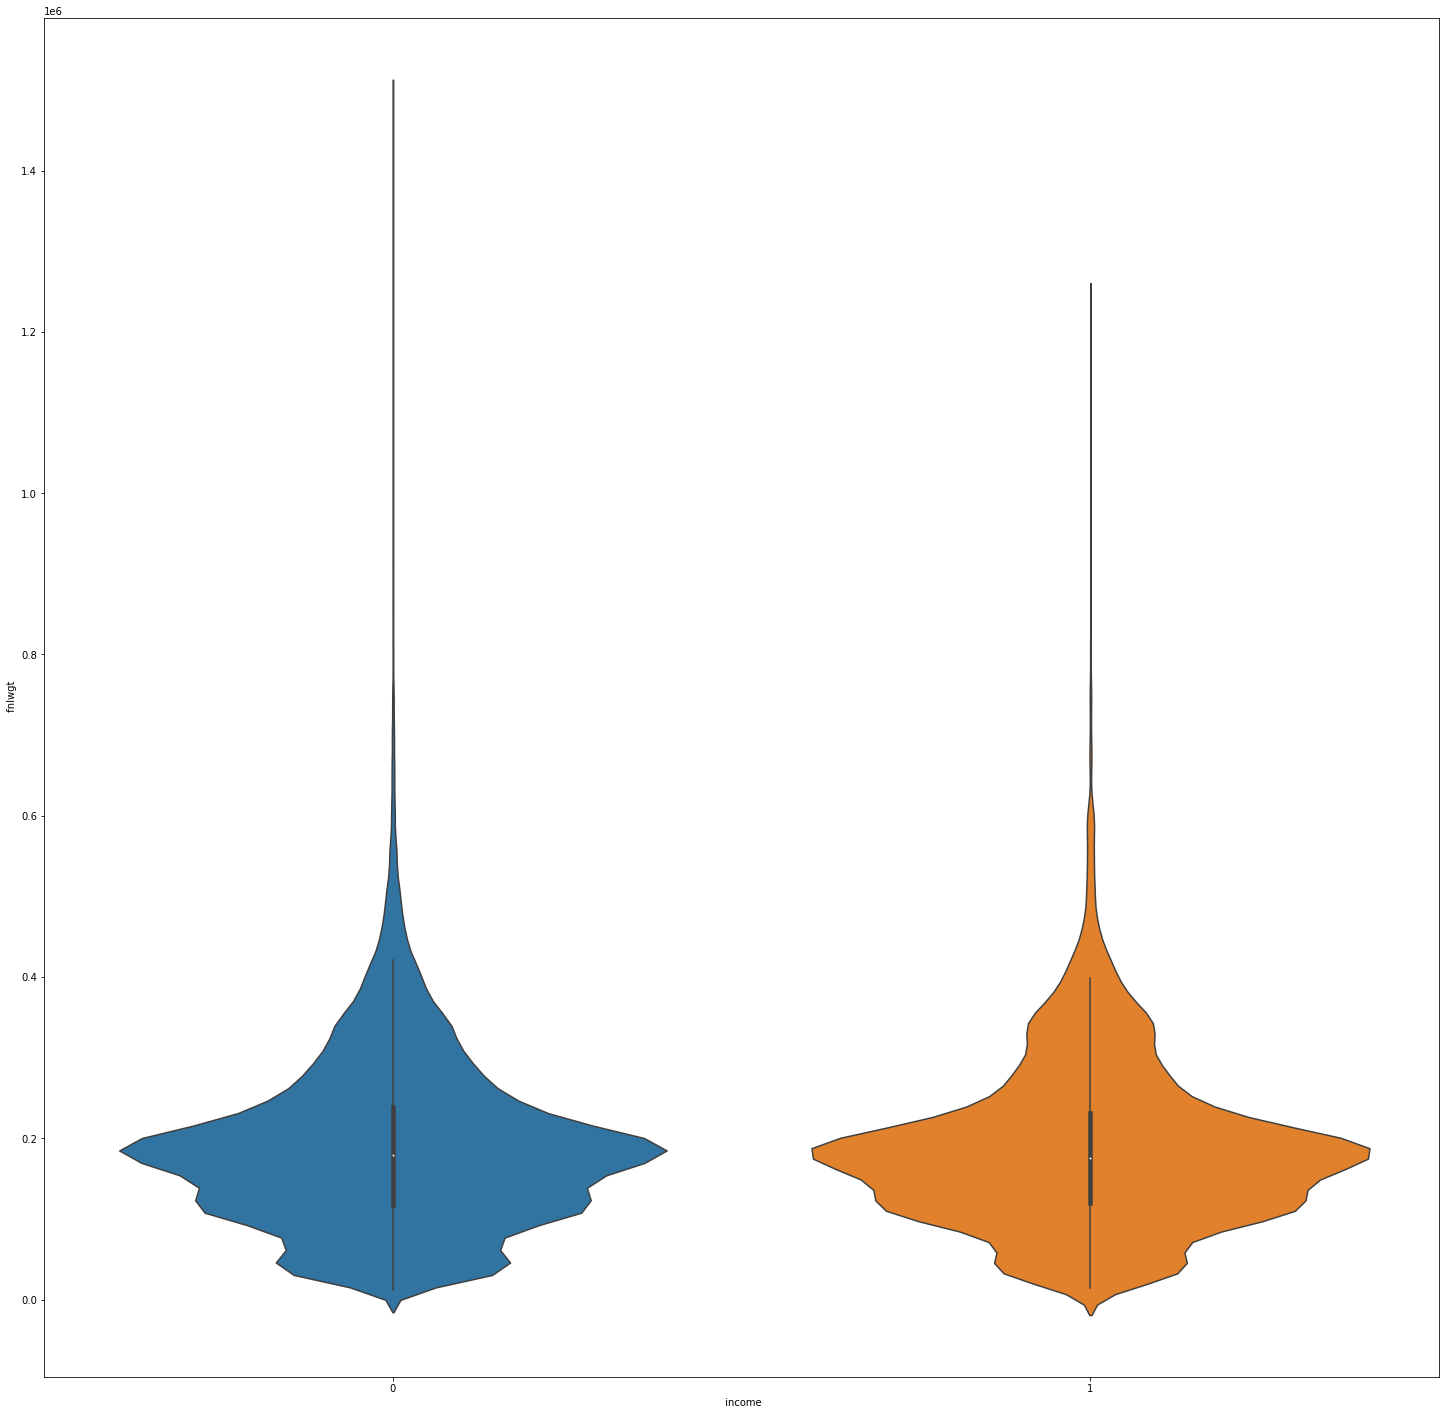

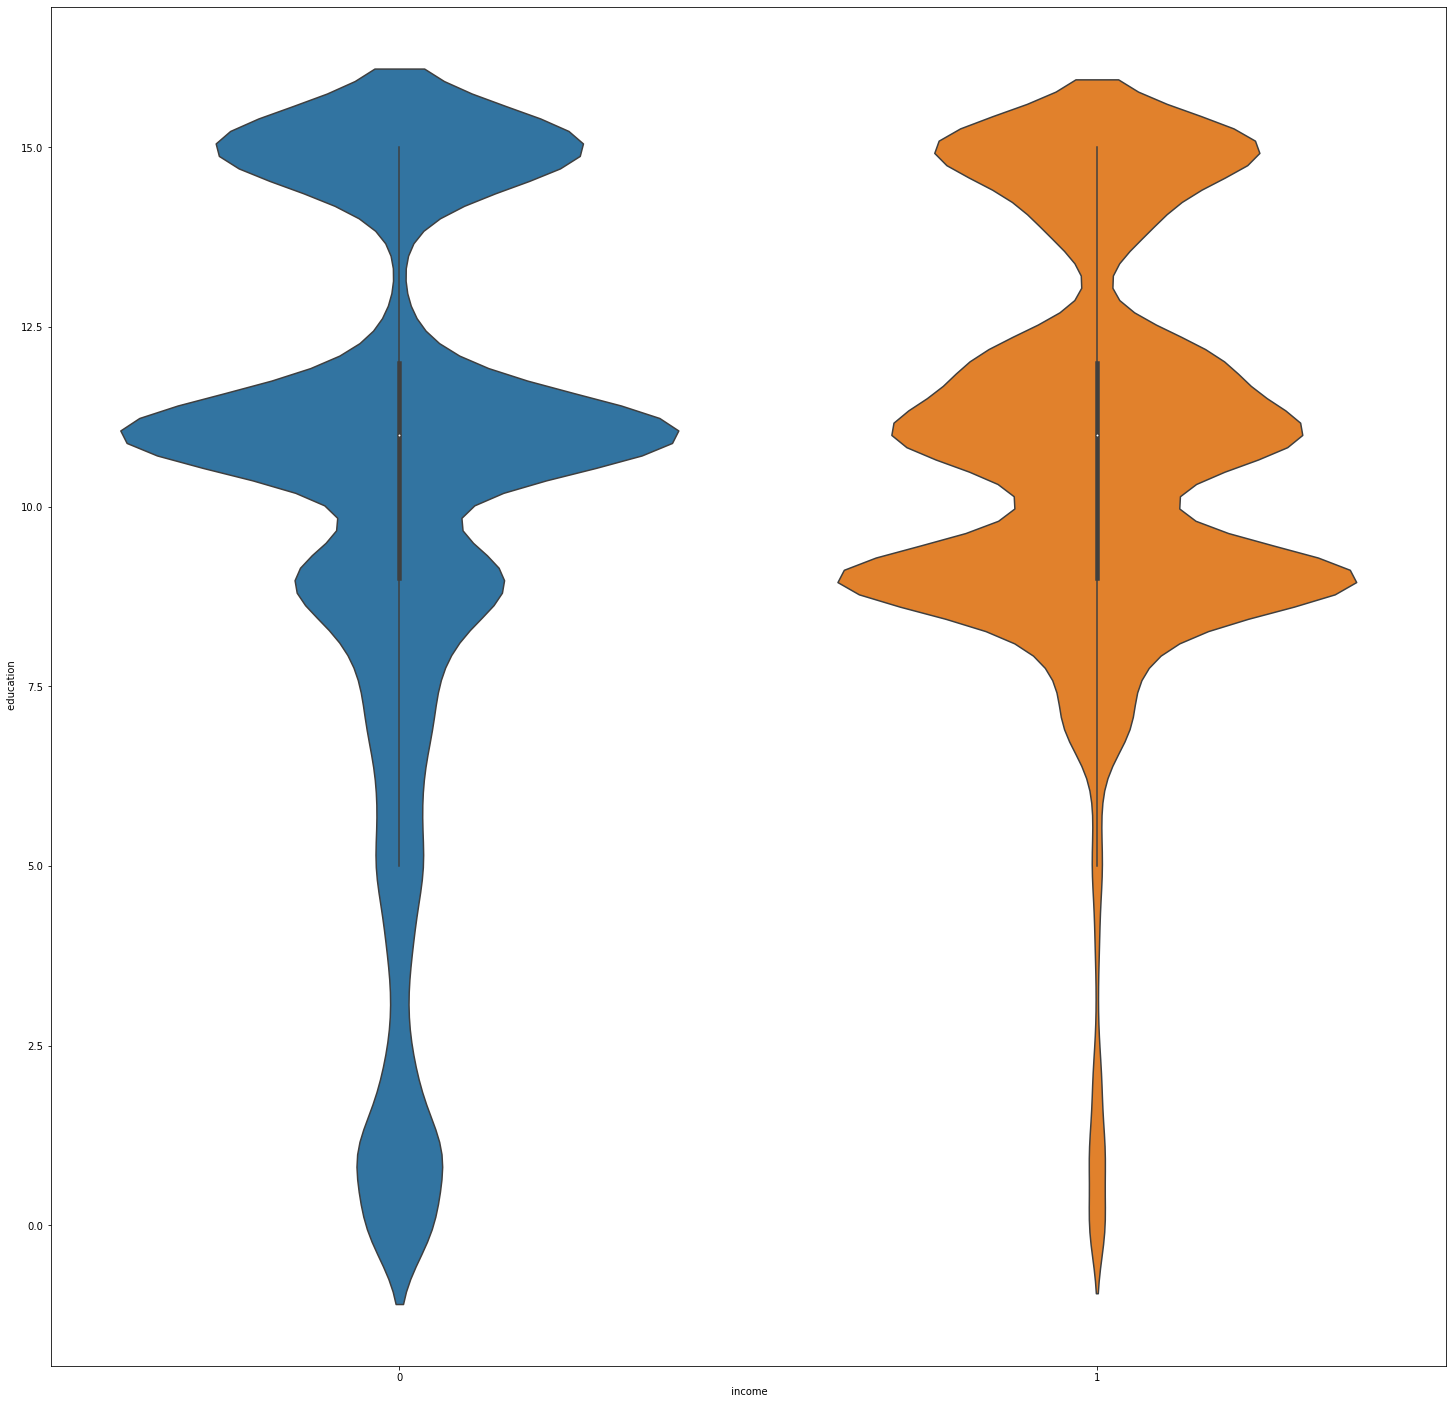

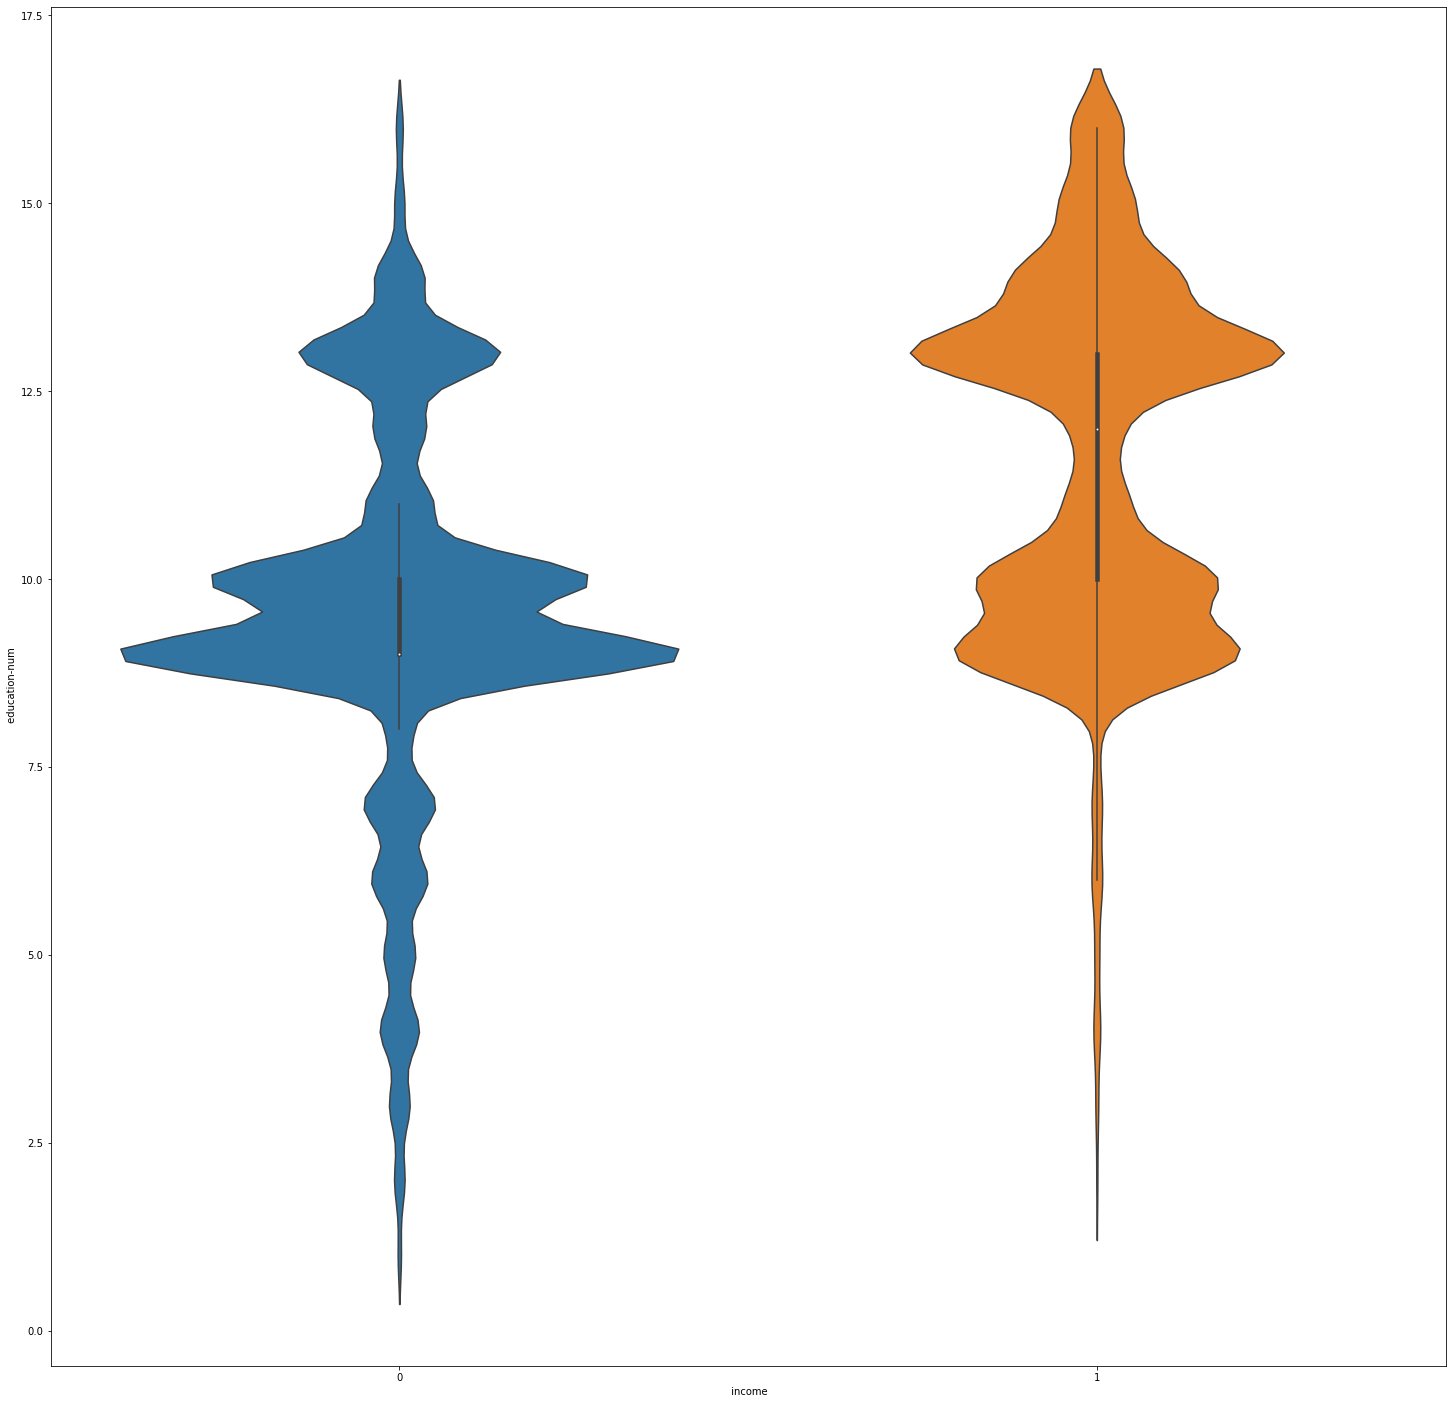

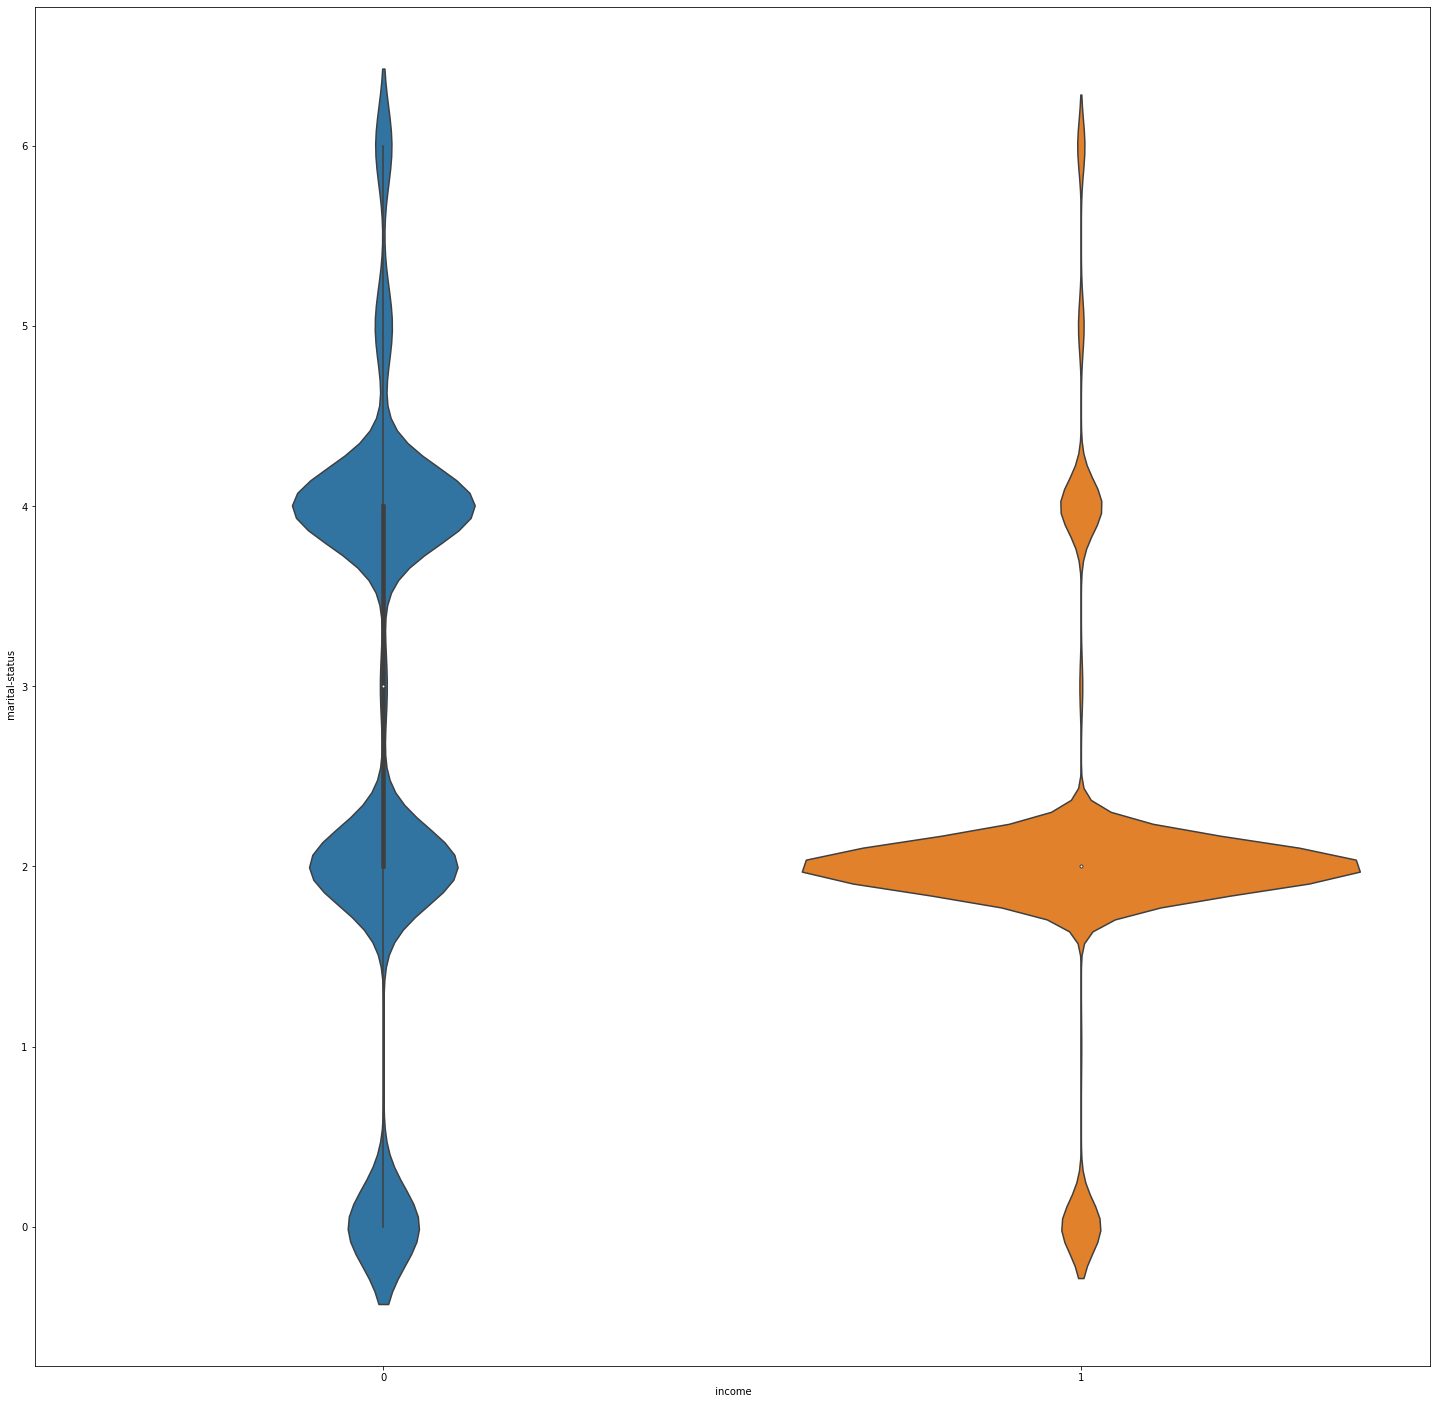

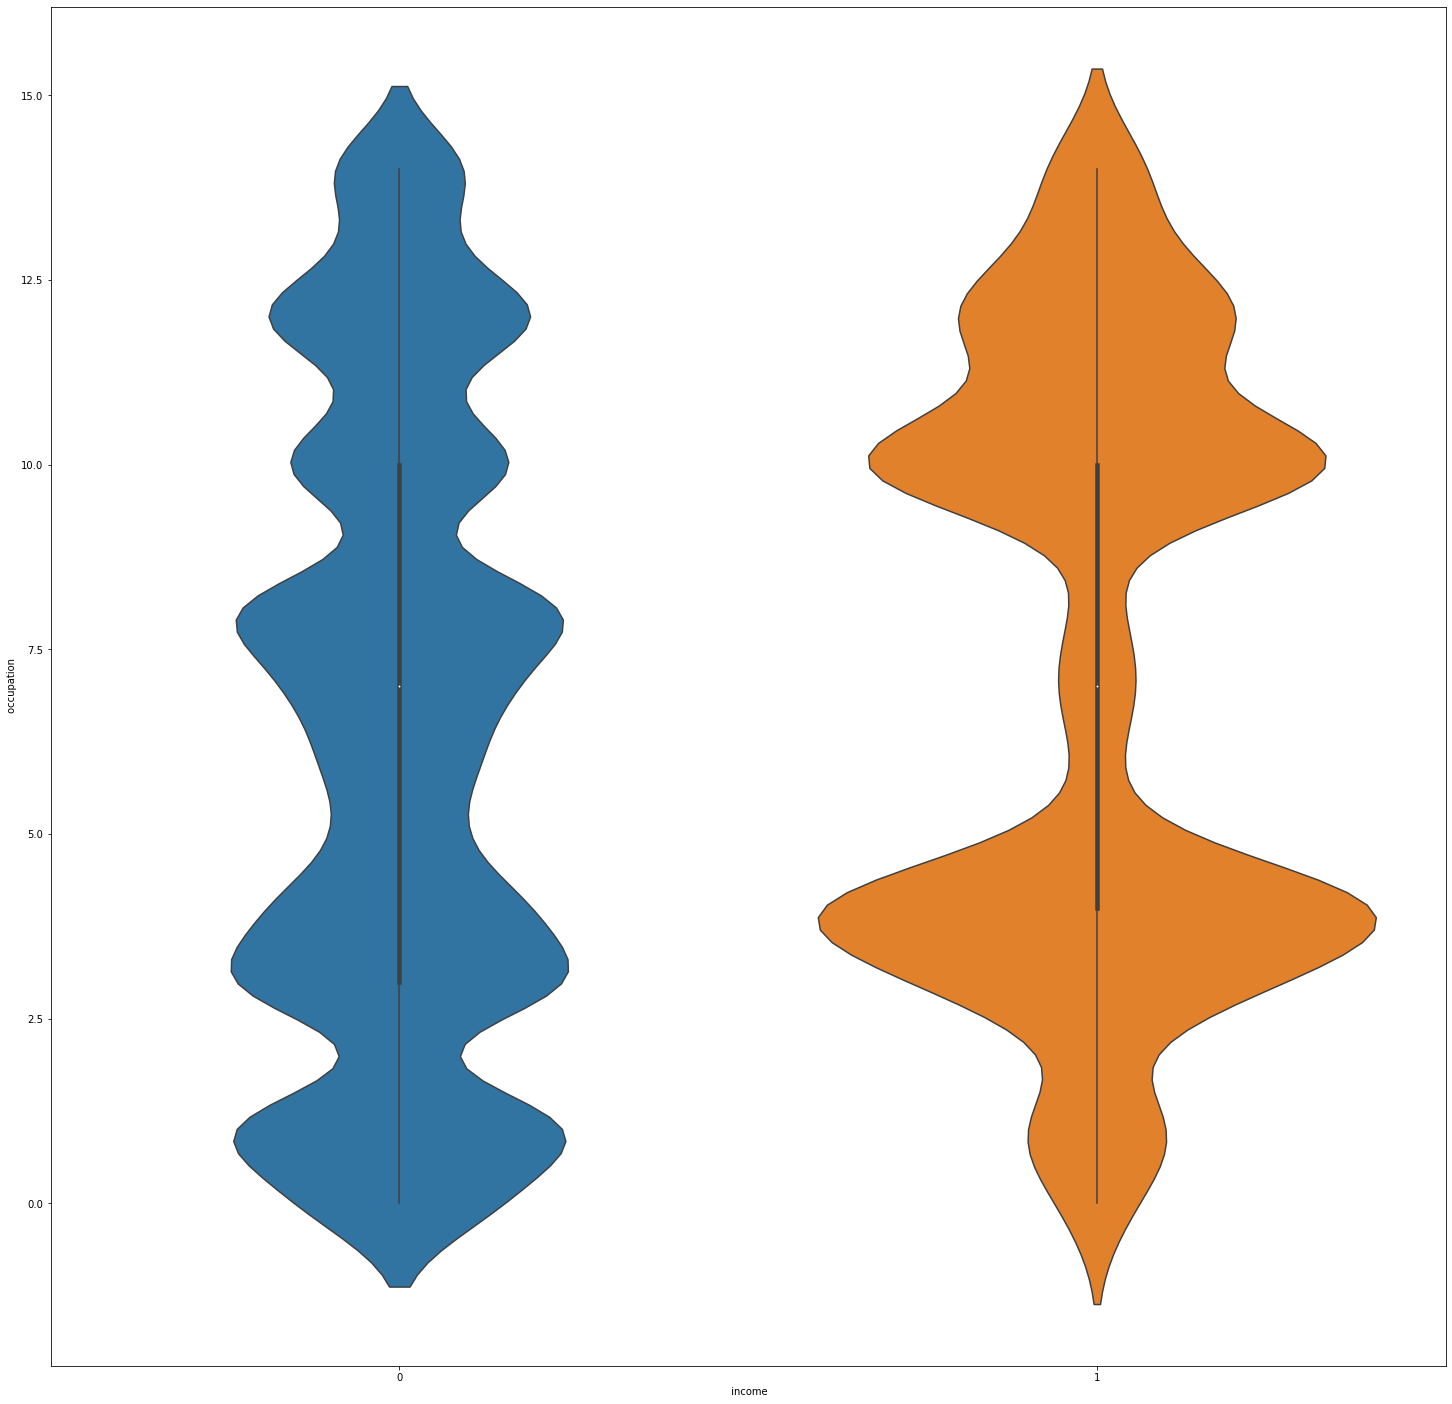

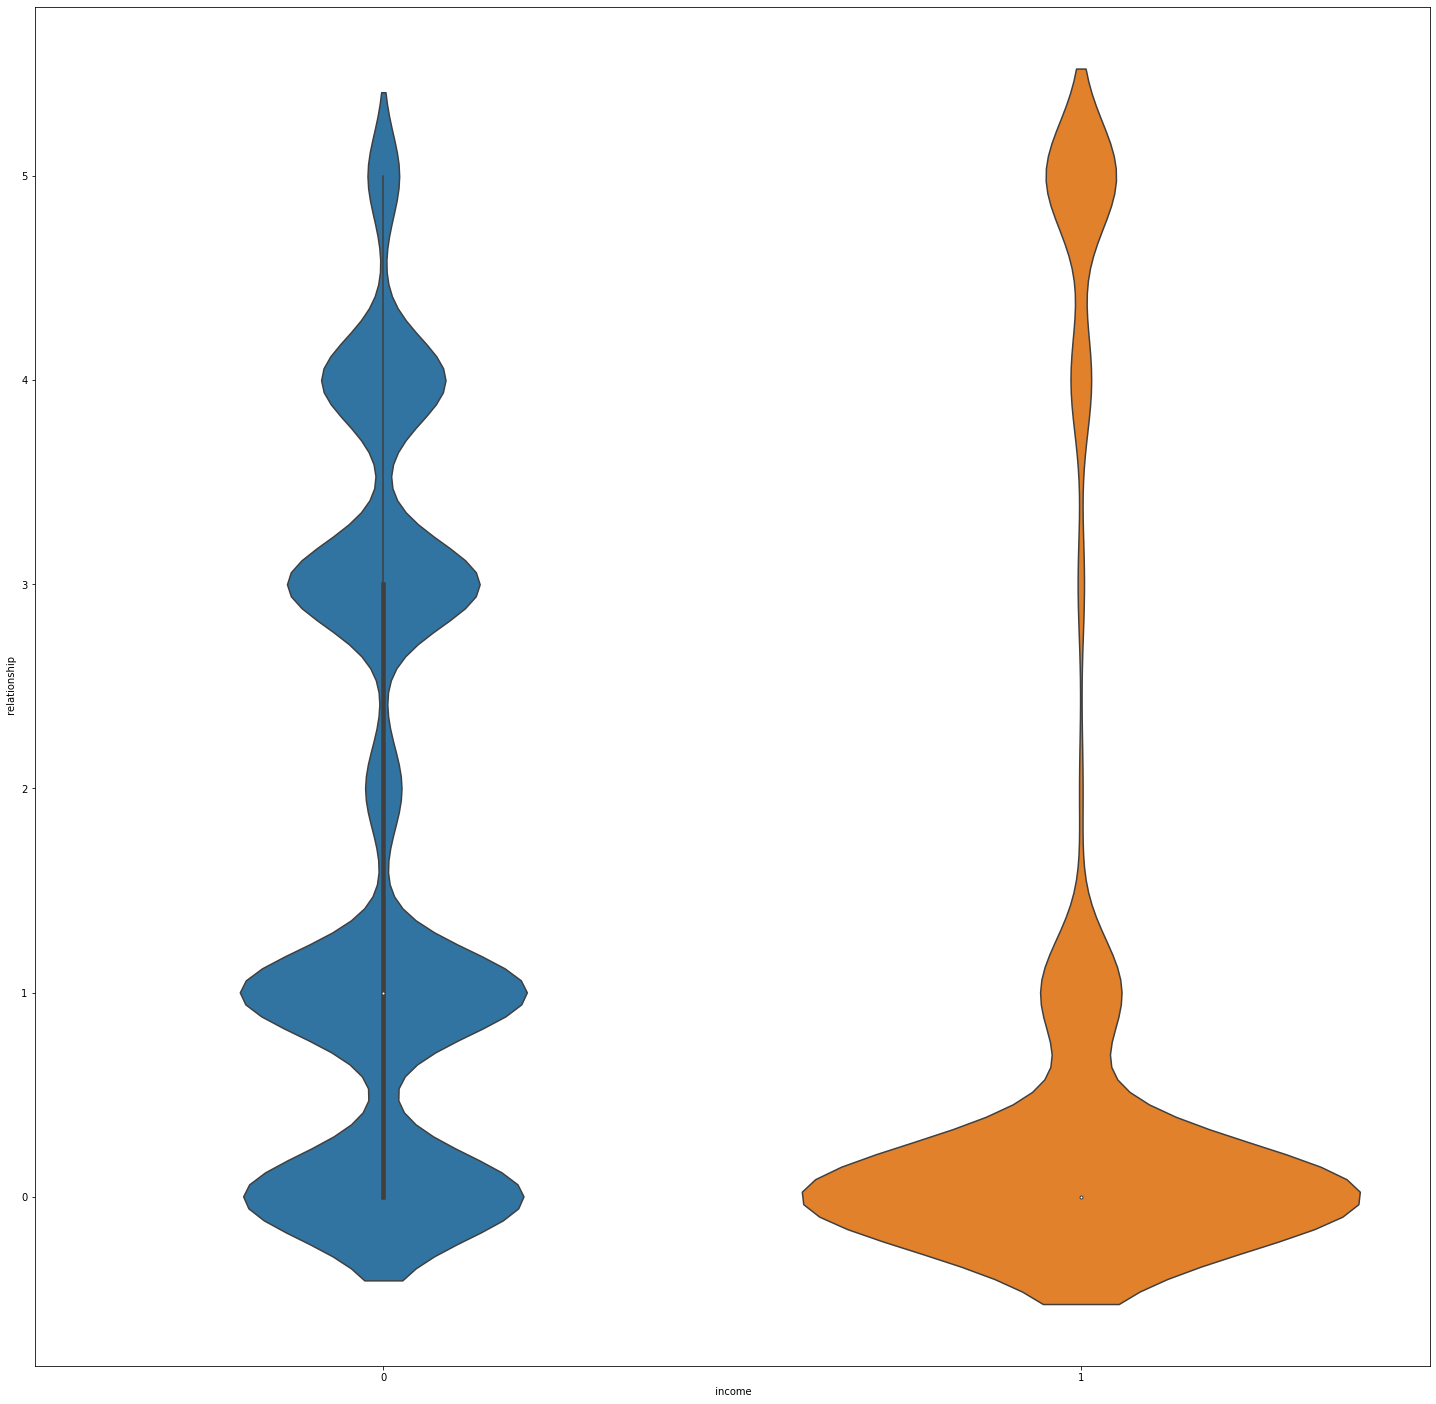

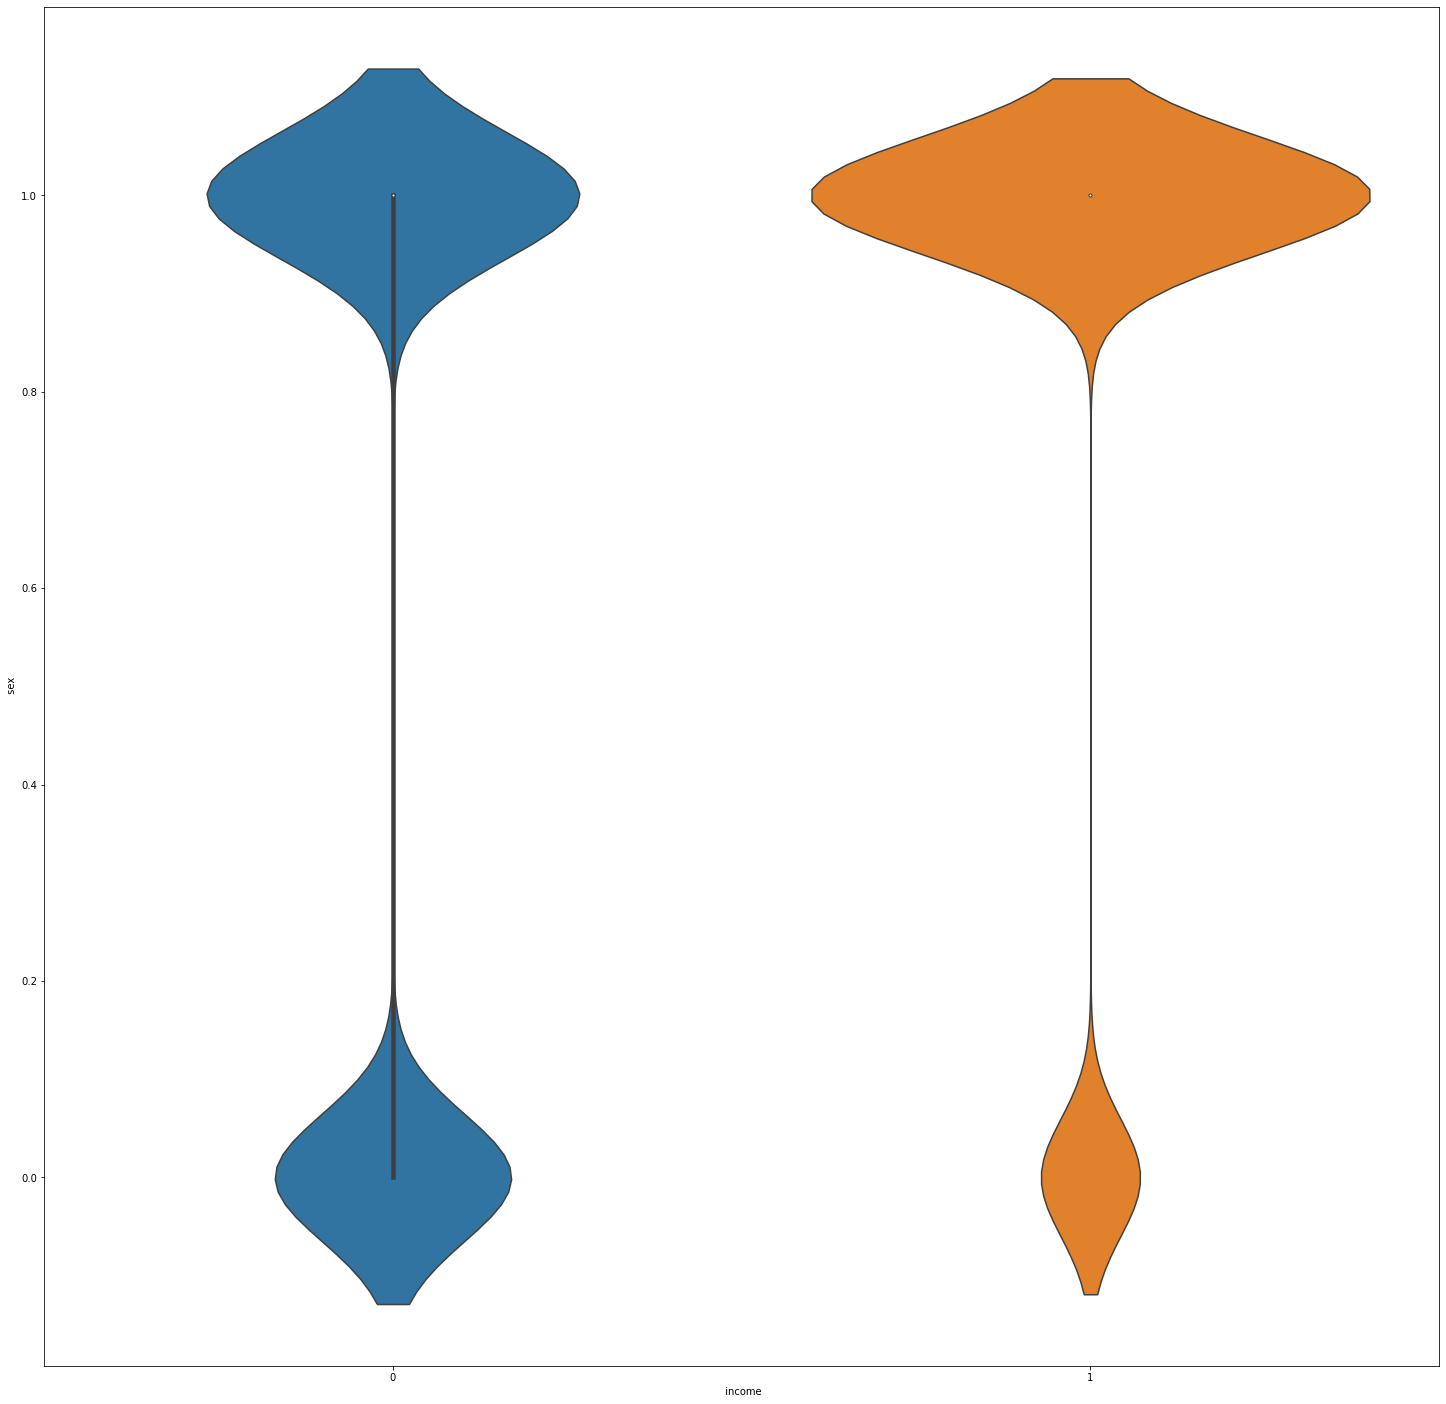

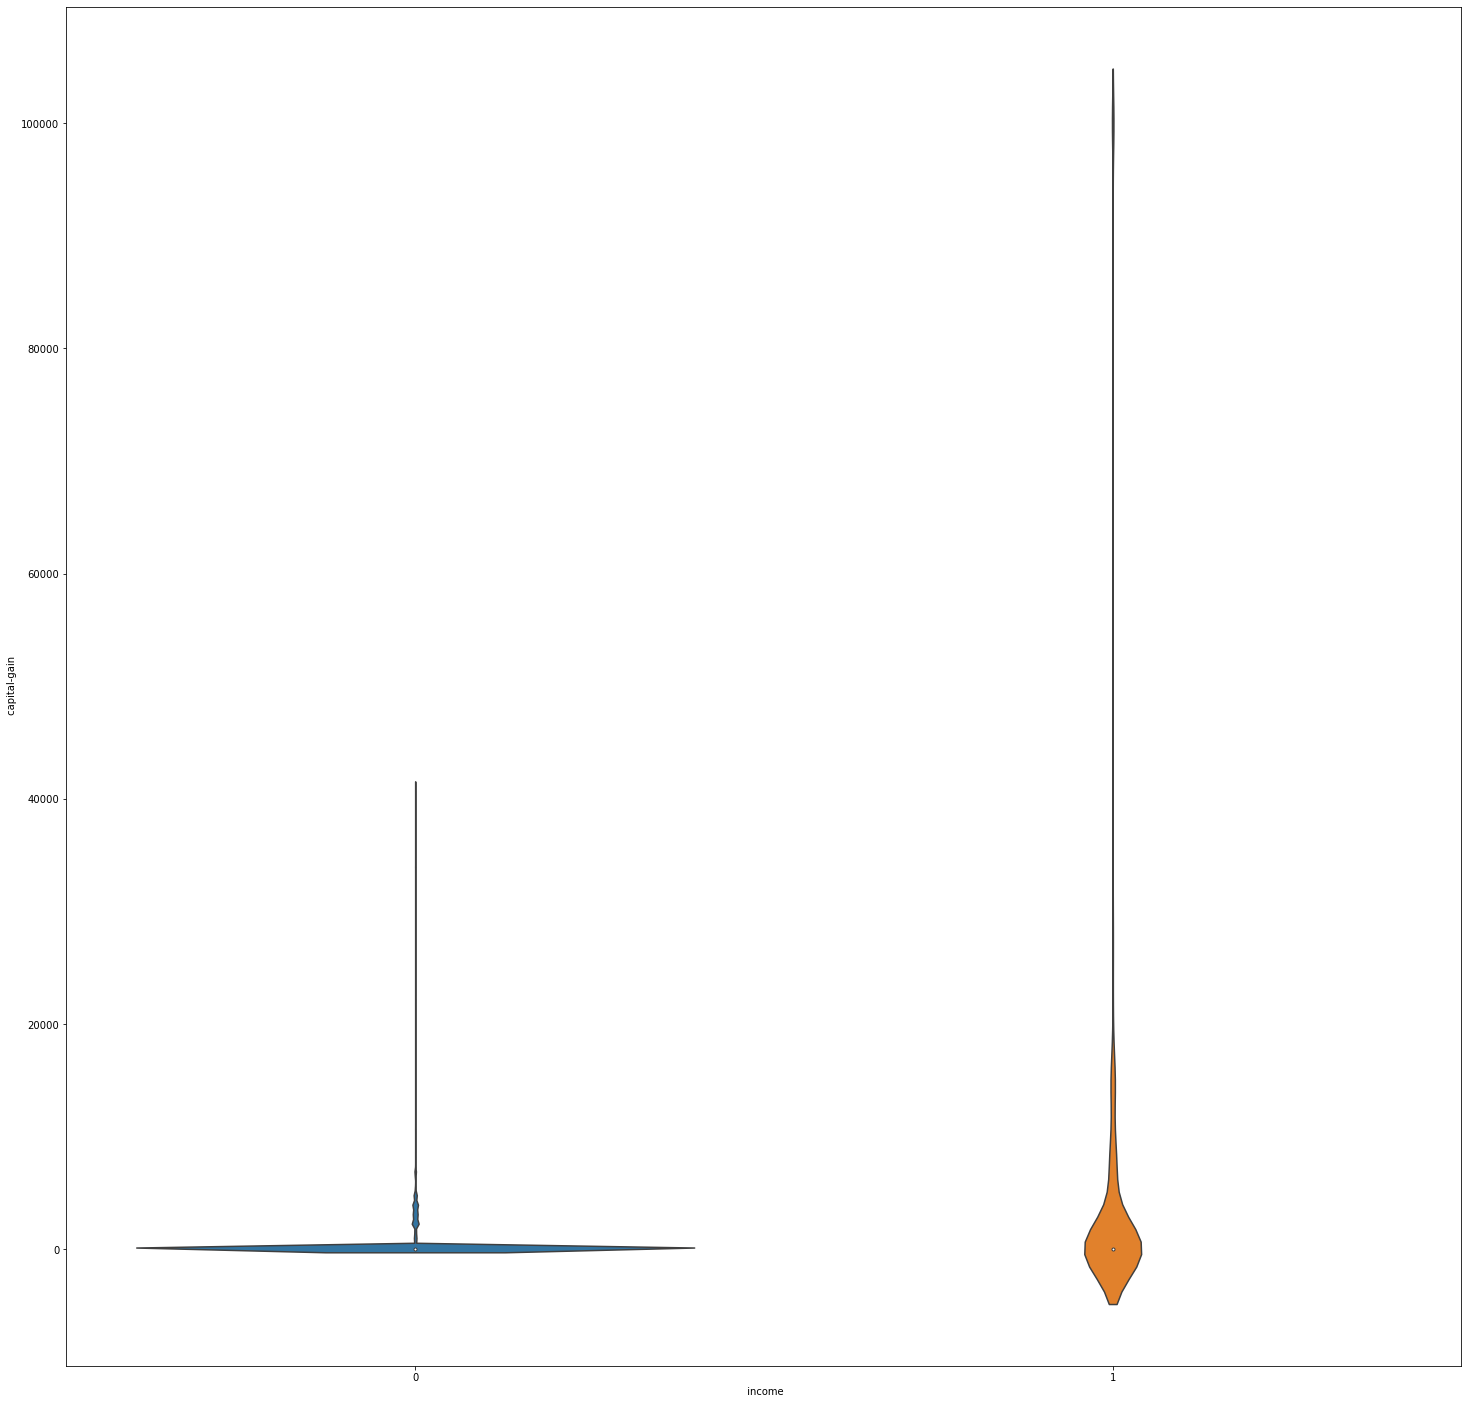

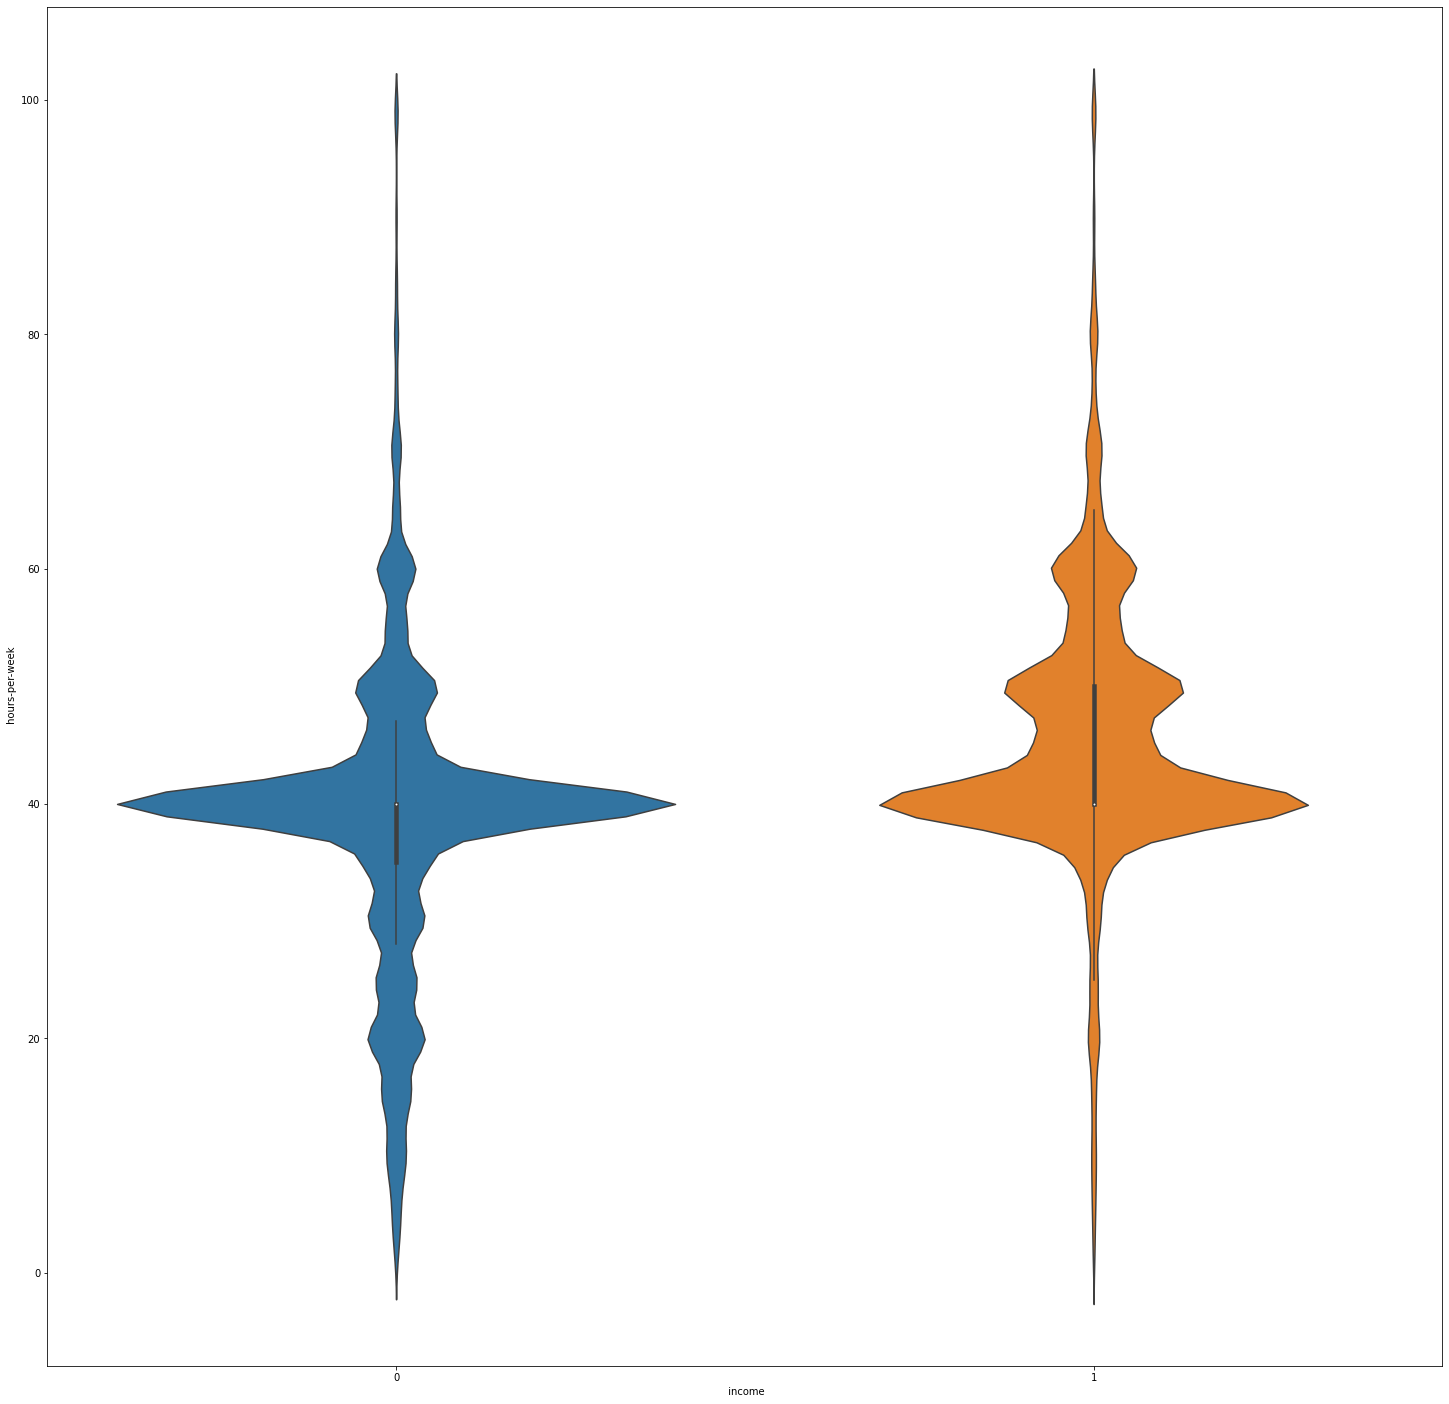

In [8]:
#выбросы - хвосты
for column in data:
    if(column != ' income'):
        fig, (axi) = plt.subplots(figsize=(25, 25), ncols=1, sharex=True, sharey=True)
        sns.violinplot(x = data[' income'], y = data[column], ax = axi)

In [9]:
data = pd.read_csv('income_evaluation.csv', sep=',')
data = data.drop([' workclass', ' race', ' capital-loss', ' native-country'], axis='columns')

for y in data.columns:
    if(data[y].dtype == object and y != ' income'):
        one_hot = pd.get_dummies(data[y])
        data = data.drop(y,axis = 1)
        data = data.join(one_hot)
data = data.drop([' ?'], axis='columns')
data[' income']= label.fit_transform(data[' income'])
        
X = data
X = X.drop([' income'], axis='columns')
y = data[' income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [14]:
#нормализуем необходимые столбцы
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
print("Качество алгоритма до нормализации", clf.score(X_test, y_test))
scaler = MinMaxScaler()
X_train_scaled_prom = pd.DataFrame(scaler.fit_transform(X_train[[' fnlwgt', ' capital-gain', ' hours-per-week', ' education-num', 'age']]), columns=[' fnlwgt', ' capital-gain', ' hours-per-week', ' education-num', 'age'])
X_test_scaled_prom = pd.DataFrame(scaler.transform(X_test[[' fnlwgt', ' capital-gain', ' hours-per-week', ' education-num', 'age']]), columns=[' fnlwgt', ' capital-gain', ' hours-per-week', ' education-num', 'age'])
X_train_scaled_prom.head(10)

Качество алгоритма до нормализации 0.7812308070261639


,fnlwgt,capital-gain,hours-per-week,education-num,age
0,0.133196,0.00000,0.346939,0.533333,0.164384
1,0.124761,0.00000,0.397959,0.533333,0.027397
2,0.077369,0.00000,0.397959,0.600000,0.410959
3,0.008666,0.02174,0.367347,0.800000,0.547945
4,0.014356,0.00000,0.295918,0.600000,0.082192
5,0.119041,0.00000,0.397959,0.533333,0.410959
6,0.431900,0.00000,0.397959,0.066667,0.328767
7,0.097815,0.02414,0.112245,0.333333,0.753425
8,0.138528,0.00000,0.602041,0.800000,0.301370
9,0.014946,0.00000,0.602041,0.600000,0.164384


In [15]:
#сбрасываем индексы
X_train_scaled = X_train.copy(deep=True)
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_train_scaled.head(10)
X_test_scaled = X_test.copy(deep=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)
X_test_scaled.head(10)

,age,fnlwgt,education-num,capital-gain,hours-per-week,10th,11th,12th,1st-4th,5th-6th,...,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Female,Male
0,27,292120,9,0,45,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,37,249208,11,0,48,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,43,54611,9,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,24,44738,9,0,40,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,39,124685,14,0,99,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,42,201732,10,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,34,122116,10,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,29,184806,15,0,50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,39,143123,11,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,35,483530,10,0,40,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


Проверяем, нужна ли нормализация

In [16]:
for y in X_train_scaled_prom.columns:
    X_train_scaled[y] = X_train_scaled_prom[y]
X_train_scaled.head(100)
for y in X_test_scaled_prom.columns:
    X_test_scaled[y] = X_test_scaled_prom[y]
X_test_scaled.head(100)

,age,fnlwgt,education-num,capital-gain,hours-per-week,10th,11th,12th,1st-4th,5th-6th,...,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Female,Male
0,0.136986,0.190051,0.533333,0.0,0.448980,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0.273973,0.160907,0.666667,0.0,0.479592,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.356164,0.028746,0.533333,0.0,0.397959,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.095890,0.022041,0.533333,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.301370,0.076337,0.866667,0.0,1.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.767123,0.075301,0.333333,0.0,0.091837,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
96,0.109589,0.094912,0.533333,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
97,0.109589,0.214892,0.600000,0.0,0.448980,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
98,0.232877,0.068118,0.333333,0.0,0.377551,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Качество алгоритма после нормализации: 0.8065348237317282


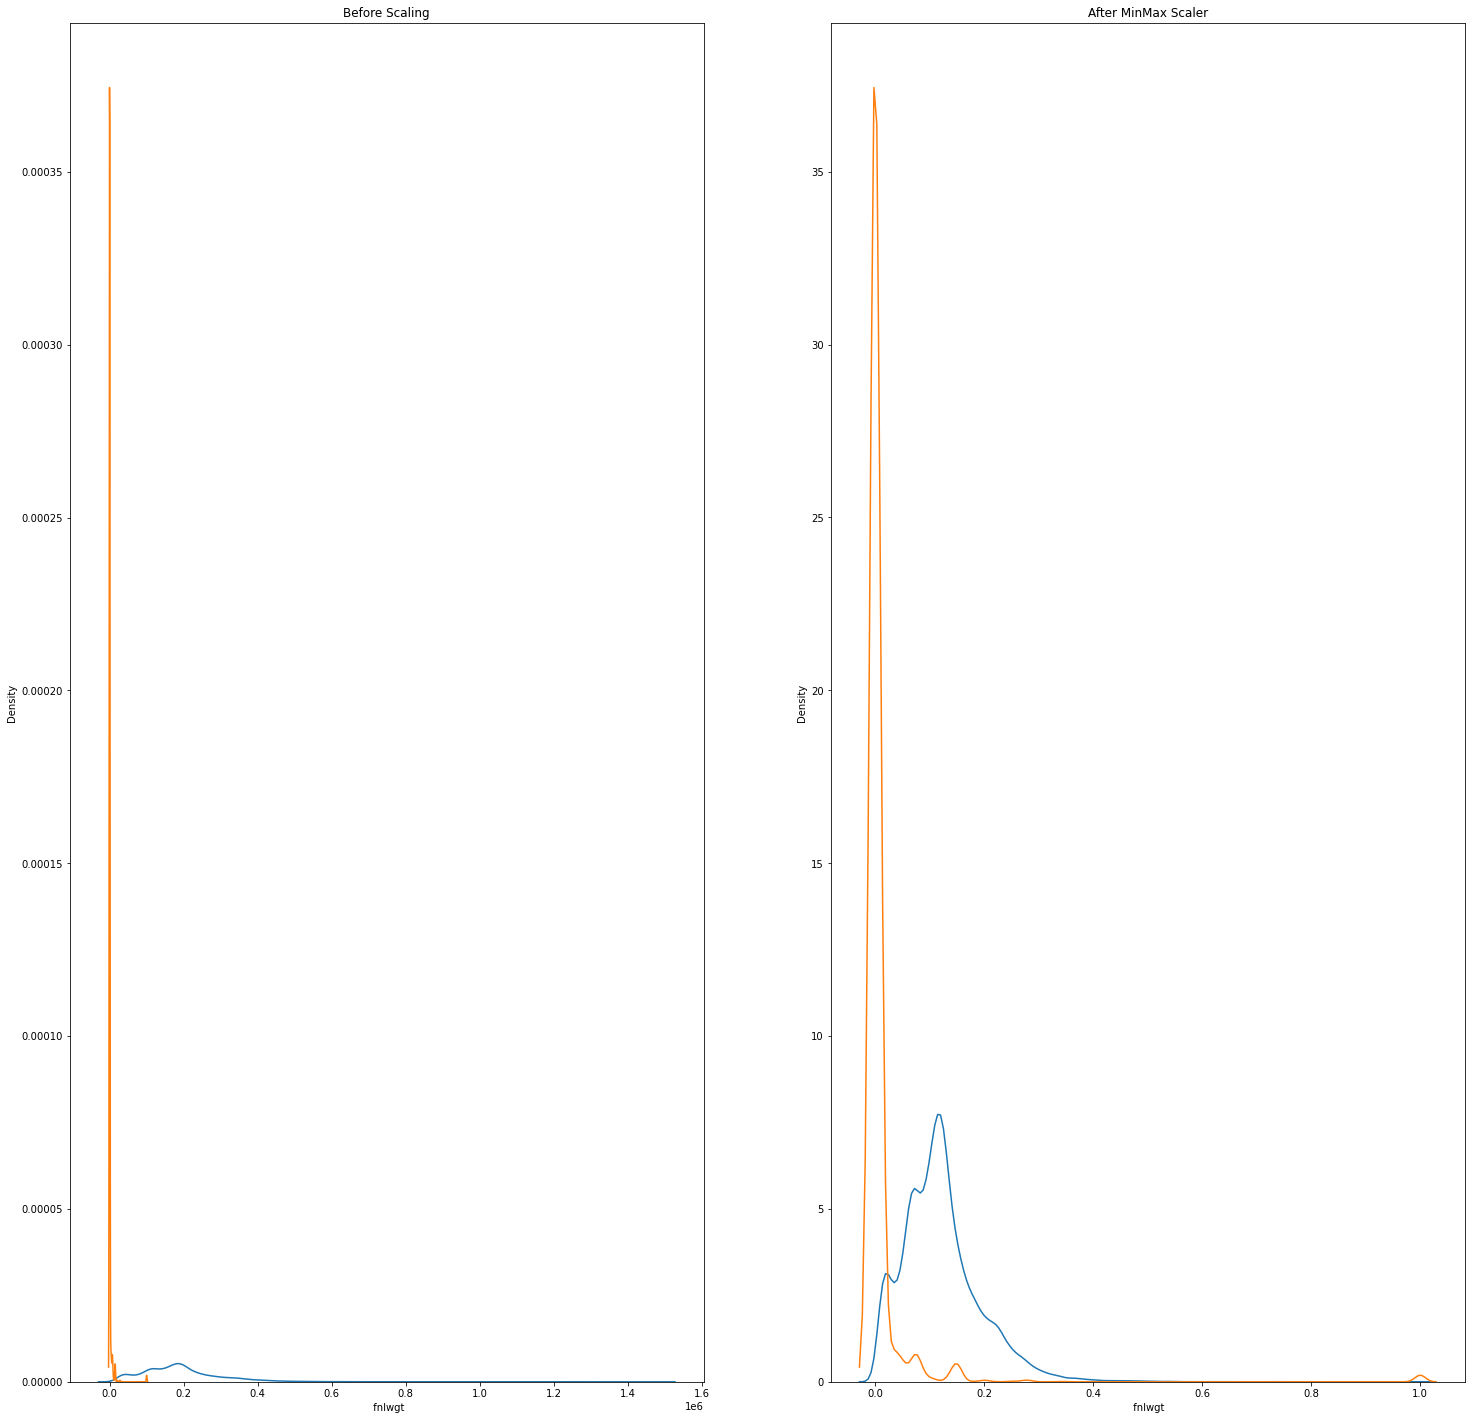

In [17]:
print("Качество алгоритма после нормализации:", KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train[' fnlwgt'], ax=ax1)
sns.kdeplot(X_train[' capital-gain'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled[' fnlwgt'], ax=ax2)
sns.kdeplot(X_train_scaled[' capital-gain'], ax=ax2)
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.8049379683085616
SGDClassifier 0.8425254882692544
SVC 0.8308561601768825
GaussianNB 0.6048397002825205
KNeighborsClassifier 0.8225033779633951


Text(0.5, 1.0, 'income Distribution')

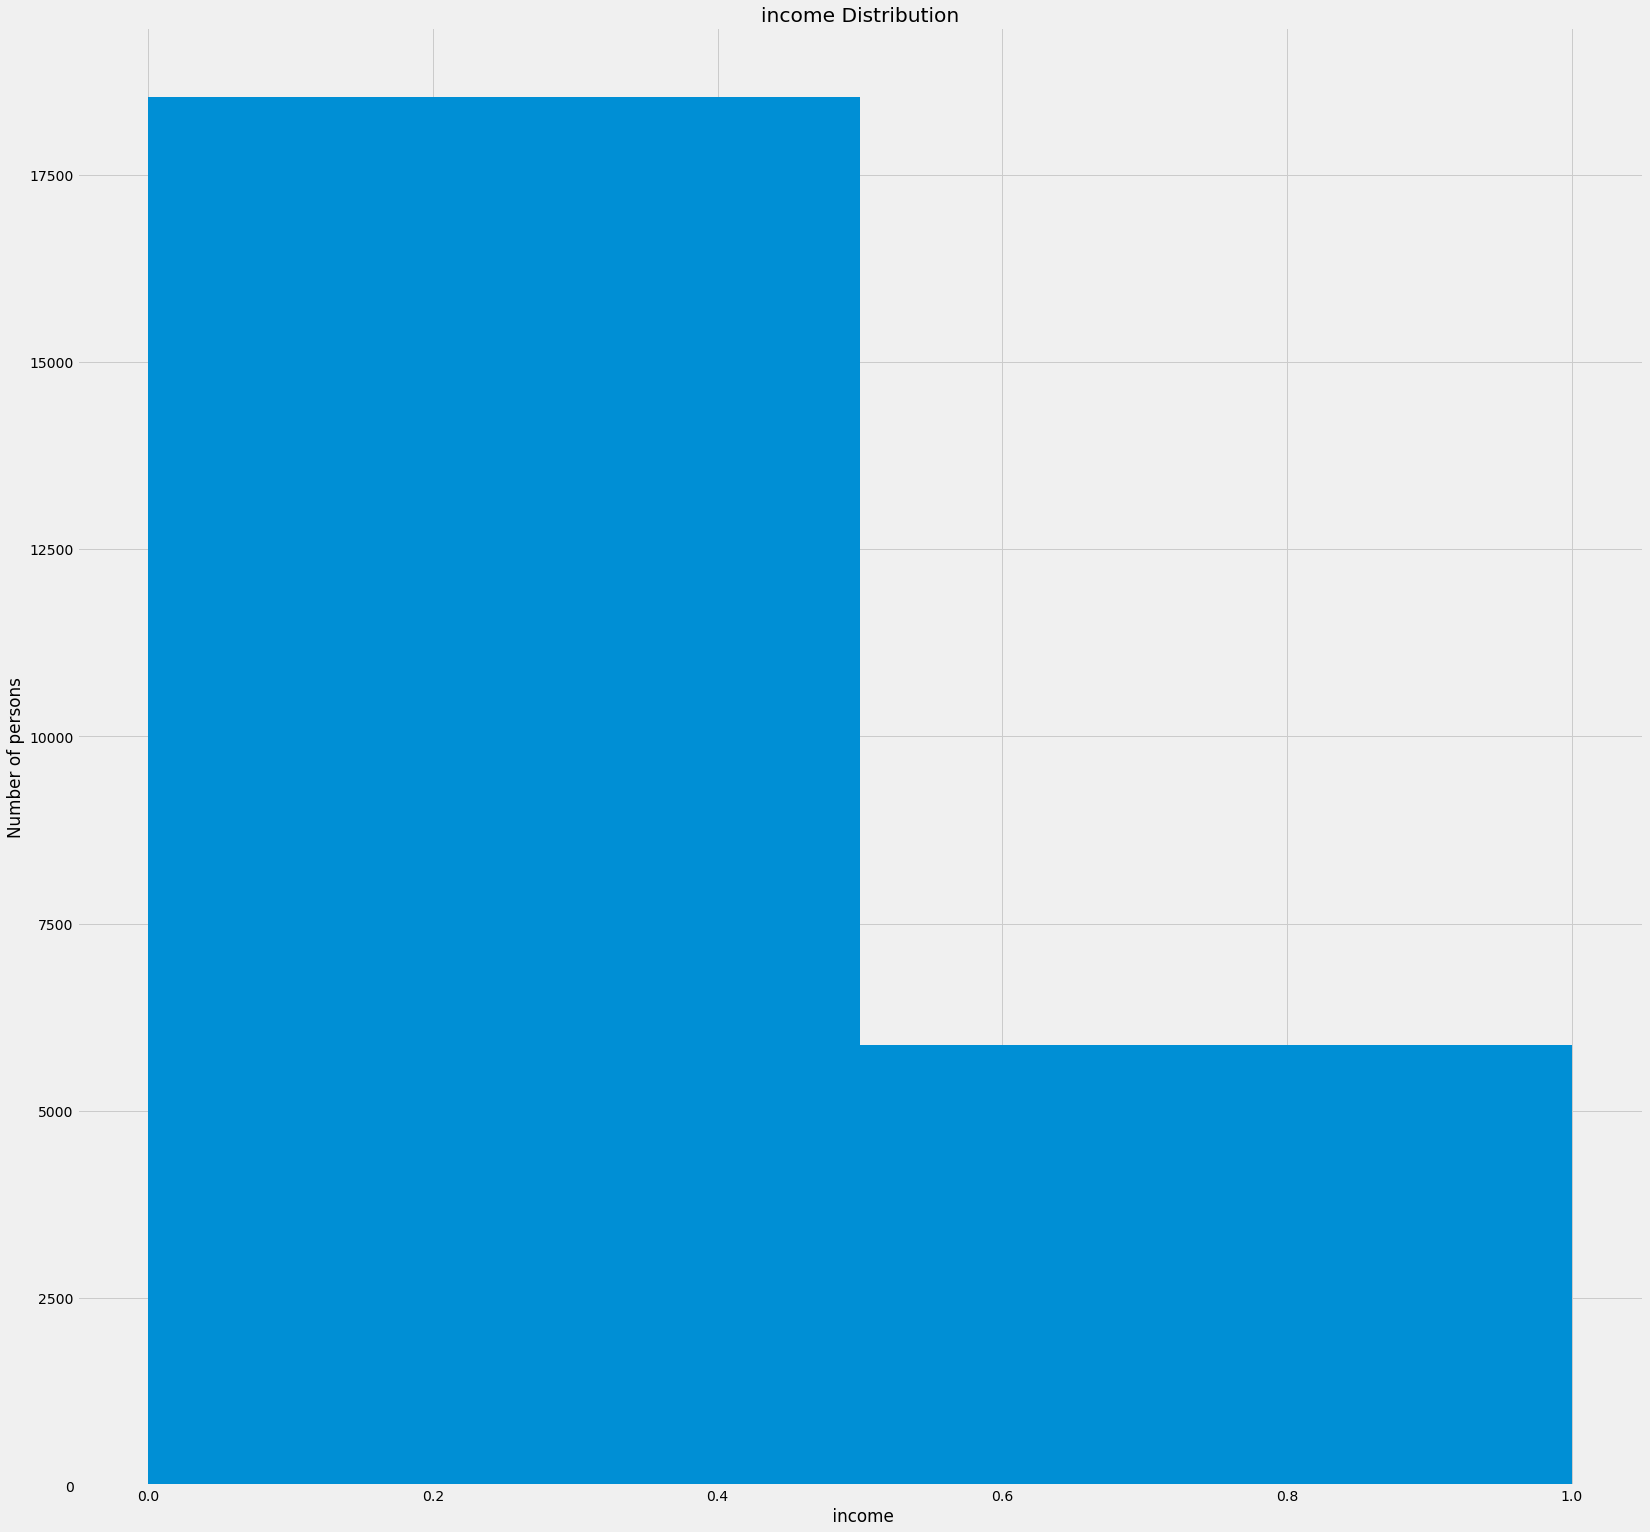

In [19]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2)
plt.xlabel(' income')
plt.ylabel('Number of persons')
plt.title('income Distribution')

соотношение не равно единицы

In [20]:
from sklearn.metrics import accuracy_score

a=np.zeros(y_test.shape[0])
accuracy_score(y_test, a)

0.7592433361994841

точность большая, хотя мы просто сказали, что никто не будет зарабатывать такую сумму

In [22]:
X_train_scaled.reset_index(inplace=True, drop=True)
y_train.reset_index(drop=True, inplace=True)

In [23]:
#увеличиваем колличество зарабатывающих такую сумму
income = X_train_scaled[y_train == 1]
X_train_strat = pd.concat([X_train_scaled, income, income], ignore_index=True)
y_train_strat = pd.concat([y_train, pd.Series(np.zeros(X_train_strat.shape[0]-X_train_scaled.shape[0]))], ignore_index=True)

In [24]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_strat, y_train_strat).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.7592433361994841
SGDClassifier 0.7592433361994841
SVC 0.7592433361994841
GaussianNB 0.5769561478933792
KNeighborsClassifier 0.7592433361994841
